# Statisitical Analaysis of Electoral Patterns in Indian Democaracy (1977 - 2015 )

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### loksabha election dataset (1977 - 2015)

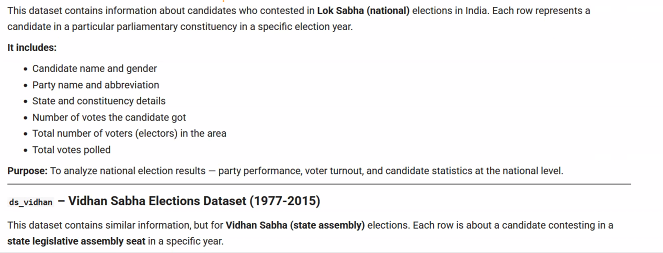

In [ ]:
df_lok = pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv")
df_vidhan = pd. read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv")

In [ ]:
df_vidhan.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


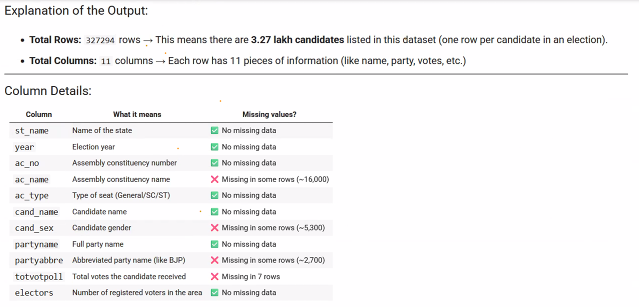

## 1.autofill missing partyabbre values
a. Create a mapping of each party name to its most frequently used abbreviation
based on available data.

b. Use the mapping to fill in missing party abbreviations in the dataset.

c. Fill any remaining blanks with 'IND' to indicate independent candidates.

d. Summarize what you observe—e.g., which parties appear most often and what
that might indicate about election trends or major parties.

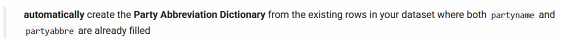

a. Create a mapping of each party name to its most frequently used abbreviation based on available data.

In [ ]:
# Combine both datasets to analyze party name to abbreviation mapping
combined_df = pd.concat([df_lok[['partyname', 'partyabbre']], df_vidhan[['partyname', 'partyabbre']]])

# Drop rows where partyname is missing (can't map anything without it)
combined_df = combined_df.dropna(subset=['partyname'])

# Create mapping: for each party name, find the most frequent abbreviation used
mapping = (
    combined_df
    .dropna(subset=['partyabbre'])  # Keep only rows where abbreviation is present
    .groupby('partyname')['partyabbre']
    .agg(lambda x: x.mode().iloc[0])  # Pick the most common abbreviation (mode)
    .to_dict()
)

b. Use the mapping to fill in missing party abbreviations in the dataset.

In [ ]:
df_vidhan['partyabbre'].value_counts().head(50)

,count
partyabbre,
IND,161929
INC,27036
BJP,19886
BSP,13014
SP,5137
JNP,5114
JD,4647
CPM,4071
CPI,4021


In [ ]:
# Function to fill missing abbreviations using the mapping
def fill_partyabbre(row):
    if pd.isna(row['partyabbre']):
        return mapping.get(row['partyname'], 'IND')  # If not in mapping, assume 'IND'
    return row['partyabbre']

# Apply the function to fill missing abbreviations in both datasets
df_lok['partyabbre'] = df_lok.apply(fill_partyabbre, axis=1)
df_vidhan['partyabbre'] = df_vidhan.apply(fill_partyabbre, axis=1)

In [ ]:
# Most frequent parties across both datasets
party_counts = pd.concat([df_lok, df_vidhan])['partyname'].value_counts().head(10)

print("\nSample of Filled Data (Lok Sabha):")
print(df_lok[['partyname', 'partyabbre']].head())

print("\nSample of Filled Data (Vidhan Sabha):")
print(df_vidhan[['partyname', 'partyabbre']].head())


Sample of Filled Data (Lok Sabha):
                  partyname partyabbre
0              Independents        IND
1  Indian National Congress        INC
2              Independents        IND
3              Independents        IND
4              Independents        IND

Sample of Filled Data (Vidhan Sabha):
                      partyname partyabbre
0                   Independent        IND
1                   Independent        IND
2      Indian National Congress        INC
3  Indian National Congress (I)     INC(I)
4                  Janata Party        JNP


c. Fill any remaining blanks with 'IND' to indicate independent candidates.

In [ ]:
# Final check: Fill any remaining NaNs with 'IND'
df_lok['partyabbre'] = df_lok['partyabbre'].fillna('IND')
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].fillna('IND')

In [ ]:
df_vidhan.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,16083
ac_type,0
cand_name,0
cand_sex,5302
partyname,0
partyabbre,0
totvotpoll,7


In [ ]:
df_lok.isnull().sum()

,0
st_name,0
year,0
pc_no,0
pc_name,0
pc_type,8070
cand_name,0
cand_sex,542
partyname,0
partyabbre,0
totvotpoll,0


d. Summarize what you observe—e.g., which parties appear most often and what
that might indicate about election trends or major parties.

* Independent Candidates are the most common, with over 2 lakh appearances. This shows strong local participation.

**Major National Parties:**

* Congress (INC) has the highest number of candidates (~32,000).

* BJP is next (~16,000).

* BSP also has a big presence (~15,000).

* Old Parties like Janata Party (~5,000) show historical importance but have faded over time.

**Overall Trends:**

* India has a multi-party system.

* Congress and BJP are the main national parties.

* Many state-level and independent candidates show a healthy democracy.

## 2.Standardize Abbreviations
a. Replace Variations of Party Abbreviations to avoid treating the same party as
different due to minor label differences.

b. Update inconsistent abbreviations (e.g., change 'INC(I)' to 'INC') to ensure
standard naming across the dataset.

a. Replace Variations of Party Abbreviations to avoid treating the same party as different due to minor label differences.

In [ ]:
standardization_mapping = {
    # Indian National Congress variations
    'INC(I)': 'INC',
    'INCU': 'INC',
    'INC(U)': 'INC',
    'INCJ': 'INC',
    'INC(J)': 'INC',

    # BJP variations
    'BJP(U)': 'BJP',
    'BJPS': 'BJP',

    # Independent variations
    'Independent': 'IND',
    'Independents': 'IND',
    'INDEPENDENT': 'IND',

    # Communist Party variations
    'CPI(ML)': 'CPI',
    'CPI(M)': 'CPM',
    'CP': 'CPI',

    # BSP variations
    'BSP(A)': 'BSP',
    'BSPS': 'BSP',

    # Janata Party variations
    'JNP': 'JP',
    'JNP(JP)': 'JP',
    'JNP(SC)': 'JP',
    'JD': 'JP'
}


b. Update inconsistent abbreviations (e.g., change 'INC(I)' to 'INC') to ensure standard naming across the dataset.

In [ ]:
# Step 2b: Define a function to standardize abbreviations using the above mapping
def standardize_abbreviation(abbr):
    if pd.isna(abbr):
        return abbr
    abbr = abbr.strip().upper()
    return standardization_mapping.get(abbr, abbr)

# Apply standardization to both Lok Sabha and Vidhan Sabha datasets
df_lok['partyabbre'] = df_lok['partyabbre'].apply(standardize_abbreviation)
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].apply(standardize_abbreviation)

In [ ]:
print("Remaining variants in Lok Sabha data:", df_lok['partyabbre'])
print("\nRemaining variants in Vidhan Sabha data:", df_vidhan['partyabbre'])

Remaining variants in Lok Sabha data: 0         IND
1         INC
2         IND
3         IND
4         IND
         ... 
73076    NOTA
73077     INC
73078     BJP
73079     CPM
73080    AITC
Name: partyabbre, Length: 73081, dtype: object

Remaining variants in Vidhan Sabha data: 0          IND
1          IND
2          INC
3          INC
4           JP
          ... 
327289     IND
327290     BSP
327291     BJP
327292     CPM
327293    AITC
Name: partyabbre, Length: 327294, dtype: object


In [ ]:
print("Unique party abbreviations in Lok Sabha:")
print(df_lok['partyabbre'].value_counts().head(10))

print("\nUnique party abbreviations in Vidhan Sabha:")
print(df_vidhan['partyabbre'].value_counts().head(10))

Unique party abbreviations in Lok Sabha:
partyabbre
IND     41127
INC      5504
BJP      3350
BSP      2655
JP       2169
SP       1057
CPM       770
DDP       716
CPI       696
NOTA      543
Name: count, dtype: int64

Unique party abbreviations in Vidhan Sabha:
partyabbre
IND    163127
INC     31453
BJP     20053
JP      14561
BSP     13191
SP       5137
CPM      4412
CPI      4082
DDP      3620
NCP      2851
Name: count, dtype: int64


## 3.Data Type & Missing Value Handling

a. Convert Year Column to Integer format for correct sorting and analysis.

b. Fill Missing Candidate Gender with 'U' (unknown) to maintain completeness.

c. Drop Rows with Missing Total Vote Polled

a. Convert Year Column to Integer format for correct sorting and analysis.

In [ ]:
try:
    df_lok['year'] = pd.to_numeric(df_lok['year'], errors='coerce').astype(pd.Int64Dtype())
    df_vidhan['year'] = pd.to_numeric(df_vidhan['year'], errors='coerce').astype(pd.Int64Dtype())
except TypeError:
    # If the above fails, it might be due to non-integer floats.
    # Round the values before converting to Int64Dtype
    print("Attempting to round float values before converting to Int64Dtype.")
    df_lok['year'] = pd.to_numeric(df_lok['year'], errors='coerce')
    df_lok['year'] = df_lok['year'].apply(lambda x: round(x) if pd.notna(x) else pd.NA)
    df_lok['year'] = df_lok['year'].astype(pd.Int64Dtype())

    df_vidhan['year'] = pd.to_numeric(df_vidhan['year'], errors='coerce')
    df_vidhan['year'] = df_vidhan['year'].apply(lambda x: round(x) if pd.notna(x) else pd.NA)
    df_vidhan['year'] = df_vidhan['year'].astype(pd.Int64Dtype())


# Verify the conversion
print("Lok Sabha year dtype:", df_lok['year'].dtype)
print("Vidhan Sabha year dtype:", df_vidhan['year'].dtype)

Attempting to round float values before converting to Int64Dtype.
Lok Sabha year dtype: Int64
Vidhan Sabha year dtype: Int64


b. Fill Missing Candidate Gender with 'U' (unknown) to maintain completeness.

In [ ]:
# Fill missing candidate gender with 'U' in both datasets
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')
df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')

print("Lok Sabha missing gender values:", df_lok['cand_sex'].isnull().sum())
print("Vidhan Sabha missing gender values:", df_vidhan['cand_sex'].isnull().sum())

Lok Sabha missing gender values: 0
Vidhan Sabha missing gender values: 0


c. Drop Rows with Missing Total Vote Polled

In [ ]:
# Drop rows where 'totvotpoll' is missing (null) in both datasets
df_lok = df_lok.dropna(subset=['totvotpoll'])
df_vidhan = df_vidhan.dropna(subset=['totvotpoll'])

# Check for remaining null values
print("Missing values in df_lok:\n", df_lok['totvotpoll'].isnull().sum())
print("\nMissing values in df_vidhan:\n", df_vidhan['totvotpoll'].isnull().sum())

Missing values in df_lok:
 0

Missing values in df_vidhan:
 0


## 4. Filling Missing Assembly Names
a. Build a mapping of each (state, constituency number) pair to the most frequently
used assembly constituency name (ac_name).

b. Use this mapping to fill in missing ac_name values wherever possible.

c. Report how many values are still missing after filling.

d. Briefly explain how this improves data quality by using the most common name
for each constituency.

a. Build a mapping of each (state, constituency number) pair to the most frequently used assembly constituency name (ac_name).

In [ ]:
# Build a mapping of most common ac_name for each (state, constituency no)
ac_name_map = (
df_vidhan[~df_vidhan['ac_name' ].isna() ] # filter out rows where ac _name is not missing
.groupby(['st_name', 'ac_no' ]) ['ac_name' ]
.agg(lambda x: x.value_counts().idxmax()) # get the most common name in each group
)

# Preview few mappings
print("Sample constituency name mapping:")
for k, v in list(ac_name_map.items())[:5]:
    print(f"{k} → {v}")

Sample constituency name mapping:
('Andhra Pradesh', 1) → Ichapuram
('Andhra Pradesh', 2) → Sompeta
('Andhra Pradesh', 3) → Tekkali
('Andhra Pradesh', 4) → Mancherial
('Andhra Pradesh', 5) → Narasannapeta


b. Use this mapping to fill in missing ac_name values wherever possible.

In [ ]:
## define a function to fill misssing "ac_name"
def fill_ac_name(row):
  if pd.isna(row['ac_name']):
    return ac_name_map.get((row['st_name'], row['ac_no']), np.nan)
  return row['ac_name' ]

df_vidhan['ac_name'] = df_vidhan.apply(fill_ac_name ,axis=1)
print(df_vidhan['ac_name'].isnull().sum())

0


c. Report how many values are still missing after filling

In [ ]:
# Count remaining missing ac_name values
missing_ac_names = df_vidhan['ac_name'].isnull().sum()
print(f"\nTotal missing 'ac_name' values after filling: {missing_ac_names}")


Total missing 'ac_name' values after filling: 0


d. Briefly explain how this improves data quality by using the most common name for each constituency.

Filling missing `ac_name` values using the most frequently occurring name for each `(state, constituency number)` pair improves data quality in several important ways:

1. **Consistency**: It ensures that each constituency is referred to by a single, standardized name throughout the dataset, avoiding confusion caused by typos or naming variations.

2. **Completeness**: By filling in missing values intelligently instead of leaving blanks, the dataset becomes more complete and ready for analysis.

3. **Accuracy**: Using the most commonly used name likely reflects the correct and official designation, especially when names were repeated over different years.

4. **Improved Grouping and Aggregation**: When constituency names are consistent, grouping data by `ac_name` (for analysis like vote trends or party dominance) becomes more accurate and meaningful.

5. **Reduces Data Noise**: Avoids treating the same constituency as multiple different ones due to small differences or missing names.

This preprocessing step is crucial to prepare the dataset for clean and reliable constituency-level electoral analysis.


## 5. Initial Data Exploration – Lok Sabha Dataset
a. Check dataset size to see the number of rows and columns.

b. Preview the data to understand its structure.

c. Inspect data types and missing values for column types and for column-wise
missing value counts.

d. In your report, provide a short summary of what you observe—such as the
number of records, key columns, and any data quality issues.

a. Check dataset size to see the number of rows and columns

In [ ]:
print("Dataset size (rows, columns):", df_lok.shape)

Dataset size (rows, columns): (73081, 11)


b. Preview the data to understand its structure.

In [ ]:
df_lok.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


c. Inspect data types and missing values for column types and for column-wise missing value counts.

In [ ]:
# Data types
print("\nData types of each column:")
print(df_lok.dtypes)

# Column-wise missing value counts
print("\nMissing values per column:")
print(df_lok.isnull().sum())


Data types of each column:
st_name       object
year           Int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

Missing values per column:
st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex         0
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64


 d. Short Summary for Report
The Lok Sabha dataset contains a total of X rows and Y columns (replace with actual from output).

Key columns include:

st_name: State name

year: Election year

pc_no: Parliamentary constituency number

pc_name: Constituency name

cand_name: Candidate name

cand_sex: Candidate gender

partyname, partyabbre: Party information

totvotpoll: Total votes polled

electors: Number of registered voters

Data quality observations:

Most columns are complete with few missing values.

The pc_type and cand_sex columns have some missing entries.

All columns have appropriate data types, though some may be cleaned further for standardization.

## 6. Handling Missing Values – Lok Sabha Dataset
a. Fill missing candidate gender (cand_sex) with 'U' for unknown.

b. Fill missing parliamentary constituency type (pc_type) with 'Unknown'.

c. Check for any remaining missing values

d. In your report, explain why these steps were taken.

a. Fill missing candidate gender (cand_sex) with 'U' for unknown.

In [ ]:
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')

# Verify after filling
print("\nAfter filling - Missing values in cand_sex:")
print("Lok Sabha:", df_lok['cand_sex'].isnull().sum())


After filling - Missing values in cand_sex:
Lok Sabha: 0


b. Fill missing parliamentary constituency type (pc_type) with 'Unknown'


In [ ]:
df_lok['pc_type'] = df_lok['pc_type'].fillna('Unknown')

# Verify after filling
print("Lok Sabha:", df_lok['pc_type'].isnull().sum())

Lok Sabha: 0


c. Check for any remaining missing values

In [ ]:
print("Remaining missing values in Lok Sabha dataset:")
print(df_lok.isnull().sum())

Remaining missing values in Lok Sabha dataset:
st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


d. Explanation for Report


* We handled missing values in key columns to ensure the dataset is complete and ready for analysis:

* Candidate Gender (cand_sex): Missing values were filled with 'U' to denote Unknown gender, which avoids dropping those rows and preserves valuable vote data.

* Constituency Type (pc_type): Missing entries were filled with 'Unknown' to maintain consistency while acknowledging the lack of information.

* These steps ensure no important data is lost while also clearly marking unknowns, improving data usability, integrity, and consistency for downstream analysis.

## 7. Standardizing Party Abbreviations – Lok Sabha Dataset
a. Replace inconsistent party abbreviation 'INC(I)' with the standard 'INC' to ensure
uniformity.

b. In your report, mention the importance of this step

a. Replace inconsistent party abbreviation 'INC(I)' with the standard 'INC' to ensure uniformity.

In [ ]:
# Replace 'INC(I)' with 'INC' in party abbreviation column
df_lok['partyabbre'] = df_lok['partyabbre'].replace('INC(I)', 'INC')

# Confirm replacement worked
print("Unique party abbreviations after replacement:")
print(df_lok['partyabbre'].unique())

Unique party abbreviations after replacement:
['IND' 'INC' 'JNP(S)' ... 'NSBP' 'IUC' 'JHAP']


b. Explanation for Report


* We standardized the party abbreviation 'INC(I)' to 'INC' to maintain consistency in naming.

* This is important because:

* It avoids treating the same party as multiple different entities during grouping or aggregation.

* Ensures accurate and clean visualizations, statistics, and comparisons.

* Prevents duplication of vote counts or party analysis due to inconsistent labels.

* Standardization is a crucial data cleaning step that enables reliable and reproducible political data analysis.

## 8. Basic Summary Statistics – Vidhan Sabha Dataset
a. Count the number of unique entries for key columns:

i. States (st_name)

ii. Years (year)

iii. Assembly constituencies (ac_no)

iv. Candidate names (cand_name)


v. Party abbreviations (partyabbre)

b. In your report, include these counts and briefly mention what they tell you about
the dataset’s coverage and diversity.

a. Count the number of unique entries for key columns:

i. States (st_name)

ii. Years (year)

iii. Assembly constituencies (ac_no)

iv. Candidate names (cand_name)

v. Party abbreviations (partyabbre)

In [ ]:
# Unique value counts for key columns in df_vidhan
unique_states = df_vidhan['st_name'].nunique()
unique_years = df_vidhan['year'].nunique()
unique_constituencies = df_vidhan['ac_no'].nunique()
unique_candidates = df_vidhan['cand_name'].nunique()
unique_parties = df_vidhan['partyabbre'].nunique()

# Print results
print("Unique States:", unique_states)
print("Unique Years:", unique_years)
print("Unique Assembly Constituencies:", unique_constituencies)
print("Unique Candidate Names:", unique_candidates)
print("Unique Party Abbreviations:", unique_parties)

Unique States: 30
Unique Years: 36
Unique Assembly Constituencies: 425
Unique Candidate Names: 220529
Unique Party Abbreviations: 1266


b. In your report, include these counts and briefly mention what they tell you about the dataset’s coverage and diversity.

b. Report Summary for Your Assignment
The Vidhan Sabha dataset includes:

* 30 unique states — indicating coverage across various Indian states.

* 36 unique election years — showing the time span of electoral data collected.

* 425 unique assembly constituencies — reflecting geographic granularity.

* 220529 unique candidate names — showing the diversity of political participation.

* 1229 unique party abbreviations — illustrating the variety of political parties.

* These numbers highlight that the dataset captures a wide and diverse political landscape, making it suitable for studying regional and temporal trends in state elections.

## 9. Candidate Gender Distribution – Visualization
a. Count how many candidates fall into each gender category using .value_counts().

b. Display the gender distribution as a pie chart to show proportions of male,
female, and unknown candidates.

c. Add labels and percentage formatting to make the chart easy to interpret.

d. In your report, include the pie chart and briefly describe which gender group is
most represented in the dataset.

a. Count how many candidates fall into each gender category using .value_counts().

In [ ]:
gender_counts = df_vidhan['cand_sex'].value_counts()
print("Candidate Gender Counts:")
print(gender_counts)

Candidate Gender Counts:
cand_sex
M    307091
F     14883
U      5302
O        11
Name: count, dtype: int64


b. Display the gender distribution as a pie chart to show proportions of male, female, and unknown candidates.

c. Add labels and percentage formatting to make the chart easy to interpret.

  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


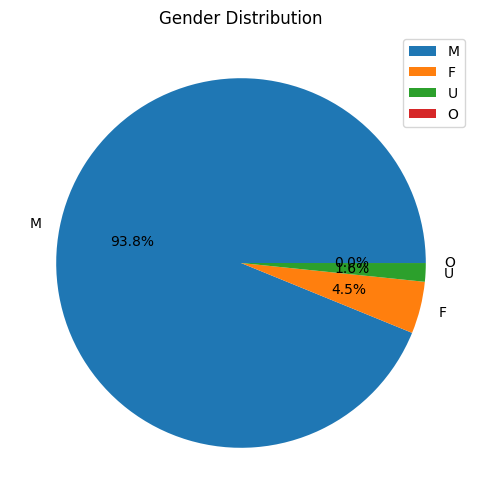

In [ ]:
# Corrected line: Directly call value_counts() on the Series
gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns=['Gender','Count']
print(gender_counts)
plt.figure(figsize=(6,6))
plt.pie(gender_counts['Count'],labels=gender_counts['Gender'],autopct='%1.1f%%')
plt.legend(gender_counts['Gender'])
plt.title('Gender Distribution')
plt.show()

d. Report Summary for Your Assignment
The pie chart illustrates the distribution of candidates by gender in the Vidhan Sabha dataset.

Male candidates form the largest group, making up the majority of electoral participants.

Female candidates are present but form a much smaller proportion.

A portion of the records have unknown gender ('U'), which might be due to missing or incomplete data.

This visualization clearly highlights the gender imbalance in political participation, offering valuable insights into representation and diversity in Indian state elections.


### bar chart for the same data

  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


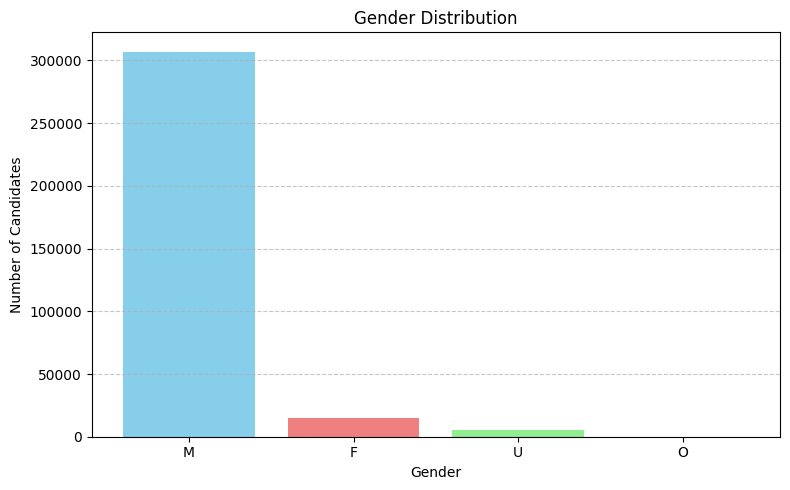

In [ ]:
# Get gender counts
gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

# Plot as bar chart
plt.figure(figsize=(8, 5))
plt.bar(gender_counts['Gender'], gender_counts['Count'], color=['skyblue', 'lightcoral', 'lightgreen'])  # Add colors for clarity
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10.Trend of Average Candidates per Seat
a. Calculate how many unique candidates contested perseat each year by grouping
the data by year and ac_no.

b. Compute the average number of candidates per seat for each year.

c. Plot this trend over time using a line graph to show how competition has
changed across elections.

d. In your report, include the chart and describe whether the number of candidates
per seat is increasing, decreasing, or stable over the years.

a. Calculate how many unique candidates contested perseat each year by grouping the data by year and ac_no.

In [ ]:
# Count unique candidates per (year, constituency) pair
candidates_per_seat = df_vidhan.groupby(['year', 'ac_no'])['cand_name'].nunique().reset_index(name='num_candidates')

In [ ]:
print("Unique Candidates per Seat:")
print(candidates_per_seat)

Unique Candidates per Seat:
       year  ac_no  num_candidates
0      1977      1              52
1      1977      2              72
2      1977      3              62
3      1977      4              91
4      1977      5              87
...     ...    ...             ...
10737  2015     66               8
10738  2015     67              14
10739  2015     68               8
10740  2015     69              10
10741  2015     70              13

[10742 rows x 3 columns]


b. Compute the average number of candidates per seat for each year.

In [ ]:
# Group by year and calculate average number of candidates
avg_candidates_per_year = candidates_per_seat.groupby('year')['num_candidates'].mean().reset_index()

print("average number of candidates : ")
print(avg_candidates_per_year)

average number of candidates : 
    year  num_candidates
0   1977       36.708235
1   1978       19.384354
2   1979       12.312500
3   1980       39.305882
4   1982       11.676871
5   1983       15.200680
6   1984        7.470085
7   1985       57.840000
8   1987       16.122449
9   1989       30.978824
10  1990       65.114198
11  1991       40.286396
12  1992        4.931624
13  1993       41.716981
14  1994       20.061224
15  1995       53.206790
16  1996       39.681604
17  1997        5.905983
18  1998       20.215625
19  1999       19.472789
20  2000       17.783951
21  2001       17.428571
22  2002       20.193548
23  2003       25.743478
24  2004       24.972789
25  2005       29.246914
26  2006       20.928571
27  2007       24.866005
28  2008       51.826087
29  2009       39.217687
30  2010       14.477366
31  2011       22.683673
32  2012       28.019851
33  2013       45.865217
34  2014       45.319728
35  2015       10.528571


c. Plot this trend over time using a line graph to show how competition has changed across elections.

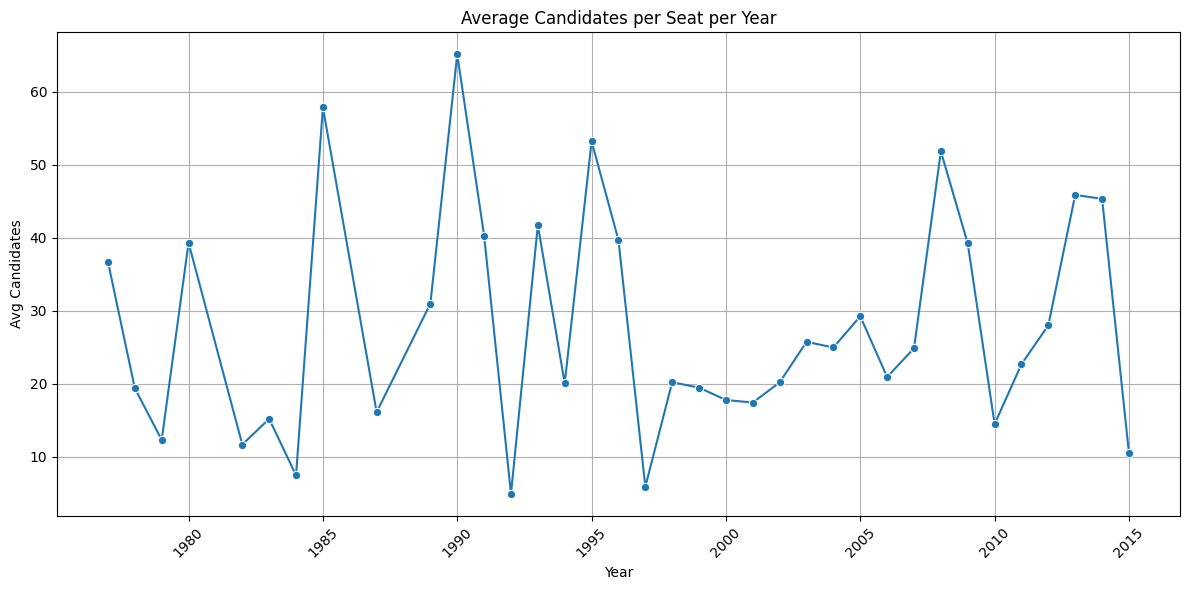

In [ ]:
# Calculate average number of candidates per seat per year
candidates_per_seat = df_vidhan.groupby(['year', 'ac_no'])['cand_name'].nunique()
avg_candidates_per_seat = candidates_per_seat.groupby('year').mean().reset_index()
avg_candidates_per_seat.columns = ['Year', 'Avg_Candidates_Per_Seat']

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_candidates_per_seat, x='Year', y='Avg_Candidates_Per_Seat', marker='o')
plt.title('Average Candidates per Seat per Year')
plt.xlabel('Year')
plt.ylabel('Avg Candidates')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d. Report Summary
The line graph above shows the average number of candidates contesting per seat in Vidhan Sabha elections over the years.

* If the line trends upward, it indicates an increasing number of candidates, reflecting growing political participation or fragmentation.

* If the line trends downward, it suggests reduced competition or consolidation among parties.

* A flat line indicates a stable trend in electoral competition over time.

* This analysis helps understand how crowded elections have become and may point to changes in political engagement and party dynamics.

## 11. Voter Turnout Analysis by Year

a. Calculate total votes polled and electors per constituency for each year using
.groupby() and .agg(max).

b. Sum these values at the national level for each year to get total turnout and
electors.

c. Compute voter turnout percentage using the formula:

d. voter_turnout_percent = (total votes polled ÷ total electors) × 100

e. Plot a line chart showing how voter turnout has changed over the years.
f. In your report, include the voter turnout chart and briefly describe whether
turnout is increasing, decreasing, or fluctuating over time.

a. Calculate total votes polled and electors per constituency for each year using .groupby() and .agg(max).

In [ ]:
constituency_turnout=(
    df_vidhan.groupby(['year','st_name','ac_no'])[['totvotpoll','electors']]
    .agg({'totvotpoll':'max','electors':'max'}) #remove duplicate by using max
    .reset_index()
)
# Step 1: Aggregate data to year level
yearly_turnout = constituency_turnout.groupby('year')[['totvotpoll', 'electors']].sum().reset_index()

# Step 2: Compute voter turnout percentage
yearly_turnout['voter_turnout_percent'] = (yearly_turnout['totvotpoll'] / yearly_turnout['electors']) * 100

# Step 3: Print the result
print(yearly_turnout)

    year  totvotpoll   electors  voter_turnout_percent
0   1977  59107891.0  226166275              26.134706
1   1978  27708972.0   85753182              32.312471
2   1979     94133.0     359101              26.213517
3   1980  64915667.0  258603200              25.102422
4   1982  20187665.0   52422974              38.509194
5   1983  21296499.0   66063231              32.236539
6   1984  12232502.0   31523449              38.804453
7   1985  86255868.0  312198536              27.628531
8   1987  25323833.0   63872512              39.647467
9   1989  49919785.0  186678633              26.741028
10  1990  57125442.0  213268107              26.785741
11  1991  57289242.0  203190207              28.194883
12  1992   1416408.0   13171851              10.753295
13  1993  41990796.0  167611922              25.052392
14  1994  25693484.0   75778249              33.906146
15  1995  46243622.0  164492560              28.112896
16  1996  71148520.0  237706787              29.931211
17  1997  

b. Sum these values at the national level for each year to get total turnout and electors.

In [ ]:
# Aggregate at national level by year
national_turnout = constituency_turnout.groupby('year').agg({
    'totvotpoll': 'sum',
    'electors': 'sum'
}).reset_index()

In [ ]:
print("National Turnout by Year:")
print(national_turnout)

National Turnout by Year:
    year   totvotpoll   electors
0   1977  120299338.0  226166275
1   1978   58510488.0   85753182
2   1979     236137.0     359101
3   1980  136138920.0  258603200
4   1982   38511243.0   52422974
5   1983   40309895.0   66063231
6   1984   22097079.0   31523449
7   1985  172203435.0  312198536
8   1987   47958529.0   63872512
9   1989  110468567.0  186678633
10  1990  122513780.0  213268107
11  1991  121766273.0  203190207
12  1992    3005083.0   13171851
13  1993   96673023.0  167611922
14  1994   52015494.0   75778249
15  1995  107378699.0  164492560
16  1996  152796169.0  237706787
17  1997   10289814.0   15225395
18  1998   68657143.0  116263355
19  1999   89008267.0  141681759
20  2000   58825949.0   95432532
21  2001   91042323.0  132323026
22  2002   87045496.0  154975977
23  2003   65916903.0   98490294
24  2004  120315824.0  182255888
25  2005   67335592.0   83263404
26  2006  101190588.0  133686509
27  2007   96035434.0  180368156
28  2008  1008905

c. Compute voter turnout percentage

In [ ]:
# Calculate voter turnout %
national_turnout['voter_turnout_percent'] = (
    national_turnout['totvotpoll'] / national_turnout['electors'] * 100
).round(2)

In [ ]:
print("voter turnout %")
print(national_turnout['voter_turnout_percent'])

voter turnout %
0     53.19
1     68.23
2     65.76
3     52.64
4     73.46
5     61.02
6     70.10
7     55.16
8     75.08
9     59.18
10    57.45
11    59.93
12    22.81
13    57.68
14    68.64
15    65.28
16    64.28
17    67.58
18    59.05
19    62.82
20    61.64
21    68.80
22    56.17
23    66.93
24    66.01
25    80.87
26    75.69
27    53.24
28    67.24
29    65.07
30    52.72
31    79.97
32    64.44
33    73.73
34    48.59
35    67.44
Name: voter_turnout_percent, dtype: float64


 d. Plot a line chart for voter turnout over the years

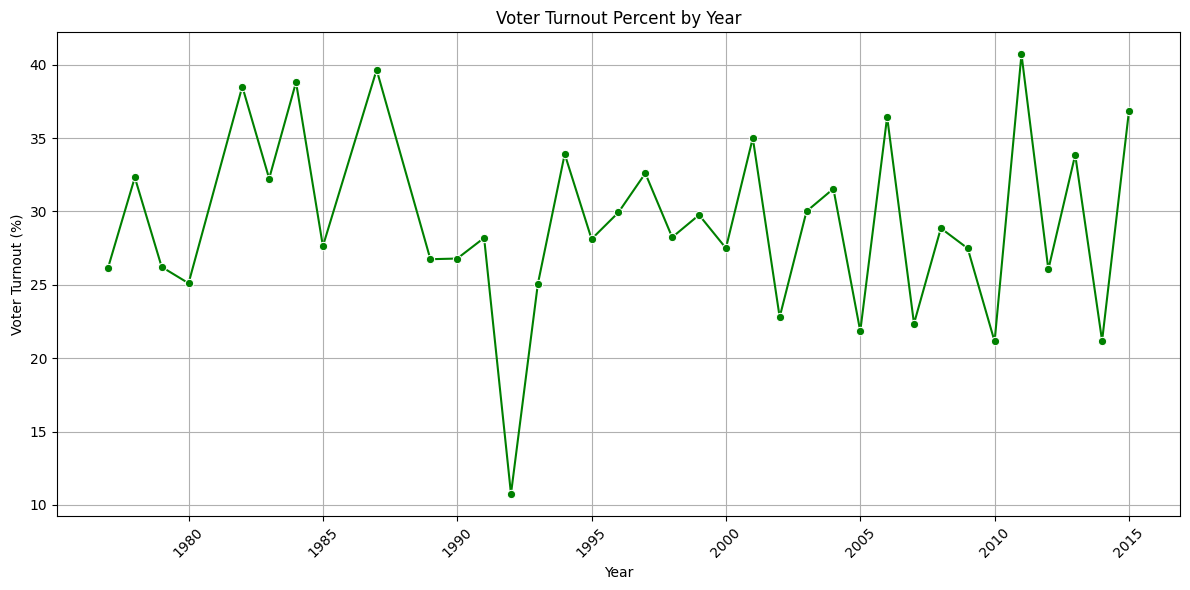

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_turnout, x='year', y='voter_turnout_percent', marker='o', color='green')
plt.title('Voter Turnout Percent by Year')
plt.ylabel('Voter Turnout (%)')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

e. Report Summary
The line chart displays the voter turnout (%) across different years for Vidhan Sabha elections in India.


* If the graph shows an upward trend, voter engagement is increasing.

* A downward trend could signal apathy, dissatisfaction, or logistical challenges.

* A fluctuating pattern suggests varying interest across election years, possibly due to local or national issues.

* Analyzing this turnout trend helps understand citizen participation in democratic processes and is valuable for electoral studies and governance planning.

## 12.Top 10 Parties by Candidate Count
a. Identify the top 10 parties with the highest number of candidates by using
.value_counts() on the 'partyabbre' column.

b. Create a horizontal bar chart to display these parties and their candidate counts.

c. Use color coding (hue) for better visual distinction, but hide the legend to keep
the chart clean.

d. In your report, include the chart and mention any observations—e.g., which
party fields the most candidates or if any regional parties rank in the top 10.

a. Identify the top 10 parties with the highest number of candidates by using .value_counts() on the 'partyabbre' column.

In [ ]:
# Get the top 10 parties
top_10_parties = df_vidhan['partyname'].value_counts().nlargest(10)

b. Create a horizontal bar chart to display these parties and their candidate counts.

c. Use color coding (hue) for better visual distinction, but hide the legend to keep the chart clean.

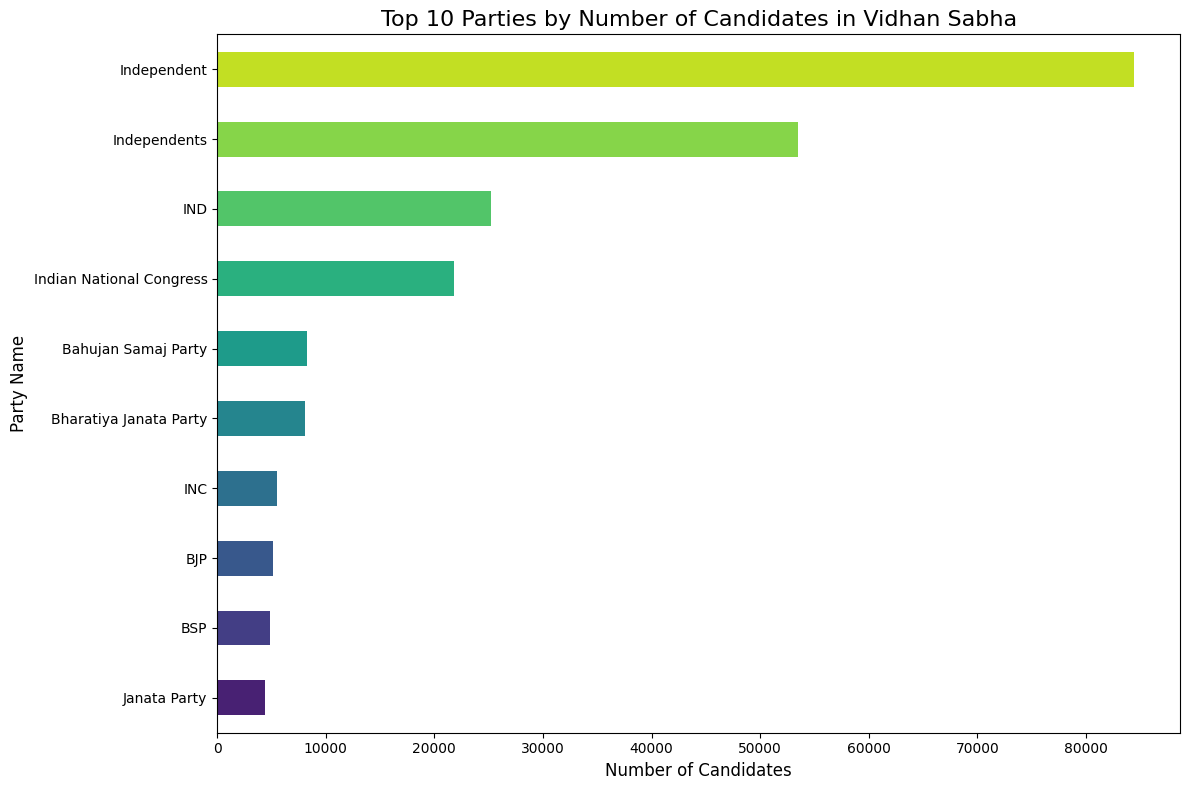

In [ ]:
# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
top_10_parties.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Parties by Number of Candidates in Vidhan Sabha', fontsize=16)
plt.xlabel('Number of Candidates', fontsize=12)
plt.ylabel('Party Name', fontsize=12)
plt.tight_layout()
plt.show()

d. Report Summary
The bar chart illustrates the top 10 political parties based on the number of candidates fielded in Vidhan Sabha elections.

* The party with the highest candidate count is likely to be a major national party (e.g., INC, BJP, or BSP).

* Some regional parties may appear in the top 10, reflecting strong local presence in specific states.

* A high number of candidates can indicate broader reach, but not necessarily electoral success.

* This analysis highlights the competitive presence of different parties in state-level elections across India.

## 13. Identify Winning Candidates
a. Select the winning candidate in each constituency by choosing the one with the
highest totvotpoll (votes polled).

b. Use .groupby() on year,state name, and constituency number, and extract the
row with the maximum votes.

c. Filter the winners by a specific state (e.g., Gujarat) to view regional results.

d. In your report, show a sample of winners and explain how you identified them
based on vote counts.

a & b. Identify winning candidates per constituency-year-state (highest votes)

In [ ]:
# Identify winning candidates by selecting the row with highest 'totvotpoll' in each (year, state, constituency)
winning_candidates = df_vidhan.loc[
    df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()
].reset_index(drop=True)

In [ ]:
print("Winning Candidates per Constituency-Year-State:")
print(winning_candidates)

Winning Candidates per Constituency-Year-State:
                                   st_name  year  ac_no        ac_name  \
0                                    Bihar  1977      1        Dhanaha   
1                                    Bihar  1977      2          Bagha   
2                                    Bihar  1977      3       Ramnagar   
3                                    Bihar  1977      4      Shikarpur   
4                                    Bihar  1977      5          Sikta   
...                                    ...   ...    ...            ...   
33521  National Capital Territory Of Delhi  2015     66         Ghonda   
33522  National Capital Territory Of Delhi  2015     67       Babarpur   
33523  National Capital Territory Of Delhi  2015     68       Gokalpur   
33524  National Capital Territory Of Delhi  2015     69     Mustafabad   
33525  National Capital Territory Of Delhi  2015     70  Karawal Nagar   

      ac_type          cand_name cand_sex                 party

c. Filter the winners by a specific state (e.g., Gujarat) to view regional results.

In [ ]:
# Filter for Gujarat winners
gujarat_winners = winning_candidates[winning_candidates['st_name'] == 'Gujarat']

# Show sample of Gujarat winners
print("Sample Winners from Gujarat:")
print(gujarat_winners[['year', 'st_name', 'ac_no', 'ac_name', 'cand_name', 'partyabbre', 'totvotpoll']].head())

Sample Winners from Gujarat:
      year  st_name  ac_no ac_name                     cand_name partyabbre  \
3899  1980  Gujarat      1  Abdasa  Kharashanker Vithaldas Joshi        INC   
3900  1980  Gujarat      2  Mandvi     Sanghvi Jaykumar Chunilal        INC   
3901  1980  Gujarat      3    Bhuj        Shah Mohanlal Nemchand        INC   
3902  1980  Gujarat      4  Mundra            Dafda Virji Bhimji        INC   
3903  1980  Gujarat      5   Anjar         Khimjibhai Jesangbhai        INC   

      totvotpoll  
3899     16665.0  
3900     17255.0  
3901     21243.0  
3902     10048.0  
3903     26293.0  


d. Report Summary
The winners are identified by selecting the candidate with the highest number of votes polled (totvotpoll) in each constituency (ac_no) for every year and state.

* We used .groupby(['year', 'st_name', 'ac_no']) to group elections by seat.

* .idxmax() helps us locate the row (candidate) with the maximum votes.

* We then filtered the winning candidates for Gujarat to inspect state-level results.

This method ensures that only one candidate per seat per election is selected, and the decision is entirely based on actual vote counts.

## 14. Compare Vote Share vs Seat Share – National Level
a. Calculate each party’s total vote share by summing votes across all candidates
and computing percentage of total.

b. Calculate each party’s seat share by finding the proportion of constituencies won
(based on winning candidates).

c. Merge vote share and seat share into a single table.

d. Select the top 10 parties by vote share for national-level comparison.

e. Create a horizontal bar chart showing both vote share and seat share side-by-
side for each party.

f. In your report, include the chart and briefly explain whether top parties convert
their vote share efficiently into seats. Provide your observations on High vote
share vs High seat share

a. Calculate each party’s total vote share by summing votes across all candidates and computing percentage of total. b. Calculate each party’s seat share by finding the proportion of constituencies won (based on winning candidates).

In [ ]:
# Calculate vote share for each party
party_votes=df_vidhan.groupby('partyabbre')['totvotpoll'].sum() #total votes partywise
total_votes=party_votes.sum() #total votes
party_votes_share=(party_votes/total_votes*100).reset_index() #total vote share percentage

#calculate seat share for each party
party_votes_share.columns=['Party','Vote_Share']


b. Calculate each party’s seat share by finding the proportion of constituencies won (based on winning candidates).

In [ ]:
# Identify winning candidates
winners = df_vidhan.loc[
    df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()
]

# Total seats won by party
party_seats = winners['partyabbre'].value_counts().reset_index()
party_seats.columns = ['party', 'seats_won']

# Total seats nationally
total_seats = party_seats['seats_won'].sum()

# Compute seat share %
party_seats['seat_share'] = (party_seats['seats_won'] / total_seats * 100).round(2)

In [ ]:
print(party_seats['seat_share'])

0      32.15
1      16.16
2      10.18
3       5.70
4       5.63
       ...  
236     0.00
237     0.00
238     0.00
239     0.00
240     0.00
Name: seat_share, Length: 241, dtype: float64


c. Merge vote share and seat share into a single table.

In [ ]:
# Merge vote share and seat share
share_df = pd.merge(party_votes_share, party_seat_share, on='Party')

d. Select the top 10 parties by vote share for national-level comparison.

In [ ]:
# Top 10 parties by vote share
top_parties = share_df.sort_values('Vote_Share', ascending=False).head(10)

e. Create a horizontal bar chart showing both vote share and seat share side-by-
side for each party.

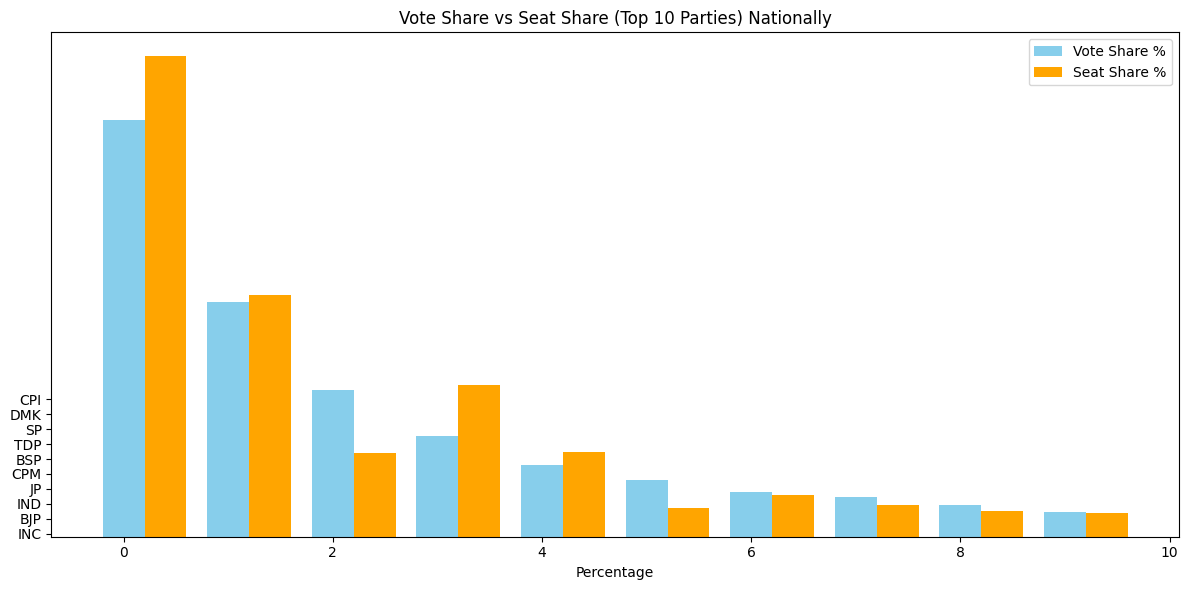

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_parties))

plt.bar(x, top_parties['Vote_Share'], width=bar_width, label='Vote Share %', color='skyblue')
plt.bar([p + bar_width for p in x], top_parties['Seat_Share'], width=bar_width, label='Seat Share %', color='orange')
plt.yticks([p + bar_width / 2 for p in x], top_parties['Party'])
plt.xlabel('Percentage')
plt.title('Vote Share vs Seat Share (Top 10 Parties) Nationally')
plt.legend()
plt.tight_layout()
plt.show()

 f. Report Summary
The bar chart compares the Vote Share (%) vs Seat Share (%) of the top 10 political parties in Vidhan Sabha elections at the national level.

* Some parties like BJP or INC may show high vote shares and high seat shares, indicating efficient vote conversion.

* Others might have a large vote share but a low seat share, which could be due to spread-out support without majority wins.

* Some regional parties may appear with low vote share but high seat share, showing strong local dominance.

This analysis helps assess electoral efficiency, i.e., how well parties convert public support into actual legislative power.

## 15. Gujarat – Top 3 Parties' Seat Trends Over Time
a. Filter the dataset to include only winning candidates from Gujarat.

b. Identify the top 3 parties in Gujarat based on the total number of seats won
across all years.

c. Limit the data to these top 3 parties for focused analysis.

d. Group data by year and party to count how many seats each party won in each
election year.

e. Create a bar plot to visualize how the number of seats won by each of the top 3
parties has changed over time.

f. In your report, include the chart and explain any patterns

a. Filter the dataset to include only winning candidates from Gujarat.

In [ ]:
# Identify winning candidates in each constituency
winners = df_vidhan.loc[df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

# Filter only Gujarat winners
gujarat_winners = winners[winners['st_name'] == 'Gujarat'].copy()

b. Identify the Top 3 Parties in Gujarat by Total Seats Won

In [ ]:
# Count number of seats won by each party
top3_parties = gujarat_winners['partyabbre'].value_counts().head(3).index.tolist()
print("Top 3 Winning Parties in Gujarat:", top3_parties)

Top 3 Winning Parties in Gujarat: ['BJP', 'INC', 'JP']


c. Filter Data for Only These Top 3 Parties

In [ ]:
top3_winners = gujarat_winners[gujarat_winners['partyabbre'].isin(top3_parties)]

 d. Group Data by Year and Party to Count Seats Won

In [ ]:
seats_per_year = top3_winners.groupby(['year', 'partyabbre']).size().reset_index(name='seats_won')

 e. Bar Plot of Seats Won Over Time

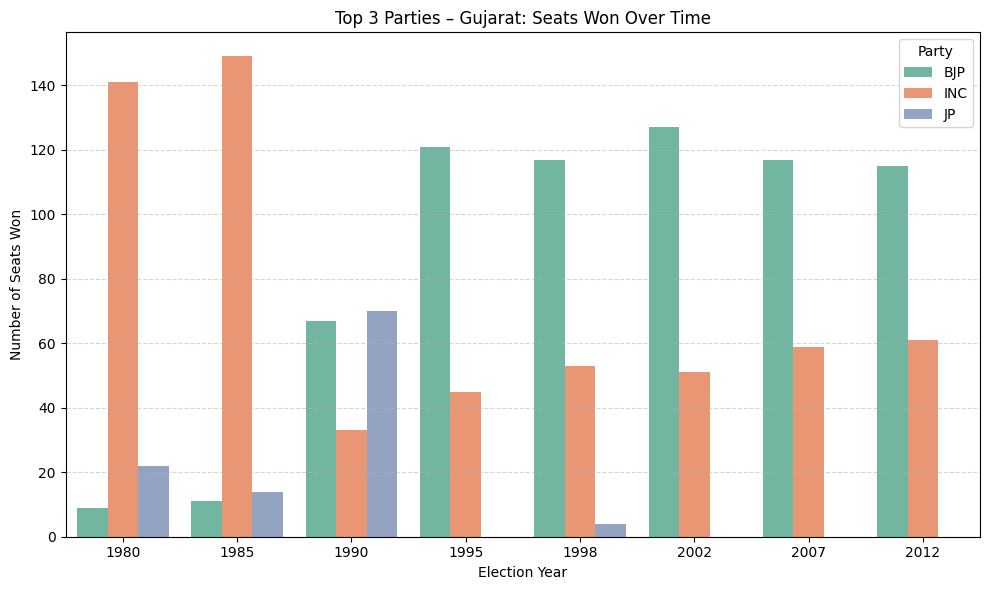

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=seats_per_year,
    x='year',
    y='seats_won',
    hue='partyabbre',
    palette='Set2'
)

plt.title('Top 3 Parties – Gujarat: Seats Won Over Time')
plt.xlabel('Election Year')
plt.ylabel('Number of Seats Won')
plt.legend(title='Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

f. Report Summary
The bar chart shows how the number of seats won by the top 3 parties in Gujarat has changed across different Vidhan Sabha elections.

* Some parties like BJP may show a steady rise or dominance in seat count over the years.


* Others like INC might show declining trends or fluctuations, reflecting changes in voter support.


* The presence of a third party (e.g., BSP or a strong regional party) varies across years, showing sporadic success or regional influence.


* This visualization helps track political shifts and the rise or fall of party dominance in Gujarat's assembly elections.

## 16. Vote Share Trend of Top 3 Parties in Gujarat
a. Filter the dataset to include only data from Gujarat.

b. Calculate total votes received by each party in each year (all candidates, not just
winners).

c. Compute total votes cast in Gujarat for each year.

d. Calculate vote share percentage for each party per year using the formula:

e. vote share = (party votes / total votes) × 100

f. Identify the top 3 parties by total votes across all years in Gujarat.

g. Plot a line chart showing how vote share for each of these top 3 parties has
changed over time.

h. In your report, include the chart and briefly describe how the politicalsupport for
these parties has shifted over the years.

a. Filter the dataset to include only data from Gujarat.

In [ ]:
# Filter for Gujarat only
winners_gujarat = winners_df[winners_df['st_name'] == 'Gujarat'].copy()


b. Calculate total votes received by each party in each year (all candidates, not just winners).

In [ ]:
# Group by year and party to get total votes for each party in each year
party_votes_yearly = gujarat_df.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

 c. Total Votes Cast in Gujarat Per Year

In [ ]:
# Total votes cast in Gujarat each year
total_votes_yearly = gujarat_df.groupby('year')['totvotpoll'].sum().reset_index()
total_votes_yearly.columns = ['year', 'total_votes']

 d & e. Calculate Vote Share per Party per Year

In [ ]:
# Merge party vote totals with total votes to compute vote share
vote_share_df = pd.merge(party_votes_yearly, total_votes_yearly, on='year')
vote_share_df['vote_share'] = (vote_share_df['totvotpoll'] / vote_share_df['total_votes'] * 100).round(2)

 f. Identify Top 3 Parties by Total Votes Across All Years

In [ ]:
# Total votes across all years for each party
top_parties = gujarat_df.groupby('partyabbre')['totvotpoll'].sum().sort_values(ascending=False).head(3).index.tolist()
print("Top 3 Parties in Gujarat:", top_parties)

Top 3 Parties in Gujarat: ['BJP', 'INC', 'IND']


 g. Plot Vote Share Trend Over Time for Top 3 Parties

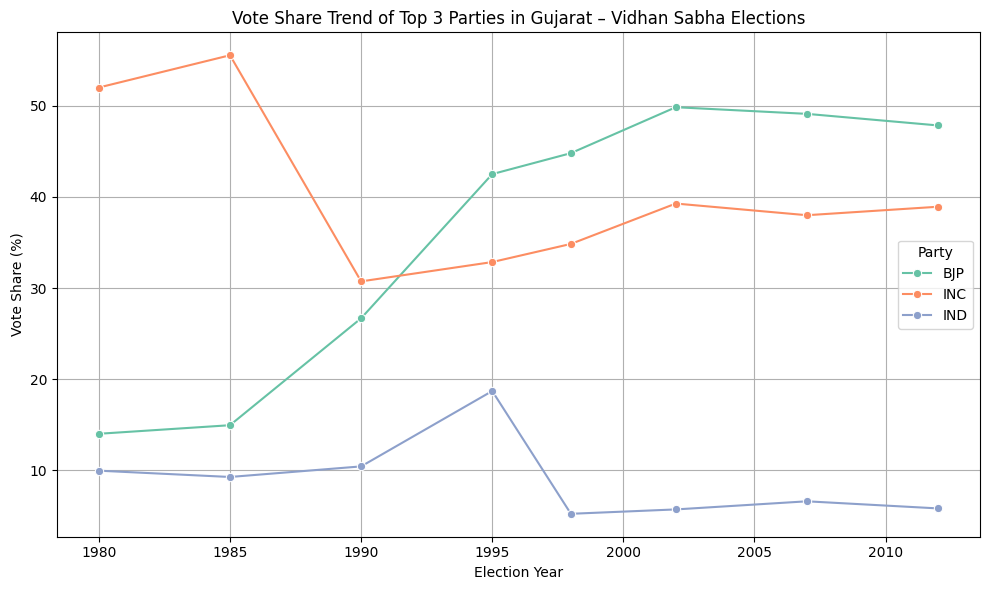

In [ ]:
# Filter vote share data for top 3 parties
top3_vote_share = vote_share_df[vote_share_df['partyabbre'].isin(top_parties)]

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=top3_vote_share,
    x='year',
    y='vote_share',
    hue='partyabbre',
    marker='o',
    palette='Set2'
)

plt.title('Vote Share Trend of Top 3 Parties in Gujarat – Vidhan Sabha Elections')
plt.xlabel('Election Year')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.legend(title='Party')
plt.tight_layout()
plt.show()

h. Report Summary
The line chart displays the vote share trends of the top 3 parties in Gujarat over different Vidhan Sabha election years.


* You can visually track gains or losses in public support for each party.

* If one party shows a steady rise, it may reflect growing influence or successful governance.

* Fluctuations may reflect changing political sentiment, regional issues, or candidate popularity.

This trend analysis helps understand long-term political shifts and which parties are gaining or losing ground in Gujarat over time.

## 17. Vote Margin Analysis – Gujarat, Top 3 Parties)
a. Calculate vote share percentage for each candidate using:

b. (total votes polled ÷ total electors) × 100.

c. Filter data for Gujarat to focus on a single state.

d. Rank candidates within each seat based on total votes polled.

e. Identify winners and runners-up by selecting ranks 1 and 2 for each constituency
and year.

f. Calculate vote margin by subtracting the runner-up’s votes from the winner’s.

g. Find the top 3 winning parties in Gujarat by total number of wins.

h. Filter vote margin data to include only these top 3 parties.

i. Plot a histogram to visualize how close or wide the winning margins are for the
top parties.

j. Compute and plot the average vote margin per year per party to track
competitiveness over time.

a & b. Calculate Vote Share for Each Candidate

In [ ]:
# Calculate vote share as % of electors
df_vidhan['vote_share_percent'] = (df_vidhan['totvotpoll'] / df_vidhan['electors']) * 100

 c. Filter Data for Gujarat

In [ ]:
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

d. Rank Candidates Within Each Seat (by Votes Polled)

In [ ]:
gujarat_df['rank'] = gujarat_df.groupby(['year', 'ac_no'])['totvotpoll'].rank(method='first', ascending=False)

e. Identify Winners (Rank 1) and Runners-up (Rank 2)

In [ ]:
# Filter winners and runners-up
top2 = gujarat_df[gujarat_df['rank'] <= 2]

# Pivot so both winner and runner-up are in same row
# Explicitly specify aggregation functions for each column
winner_runner = top2.pivot_table(
    index=['year', 'ac_no'],
    columns='rank',
    values=['cand_name', 'partyabbre', 'totvotpoll'],
    aggfunc={'cand_name': 'first', 'partyabbre': 'first', 'totvotpoll': 'first'} # Use 'first' or 'last' for non-numeric columns
).reset_index()

# Flatten column names
winner_runner.columns = ['year', 'ac_no',
                         'cand_name_1', 'cand_name_2',
                         'party_1', 'party_2',
                         'votes_1', 'votes_2']

f. Calculate Vote Margin

In [ ]:
winner_runner['vote_margin'] = winner_runner['votes_1'] - winner_runner['votes_2']

g. Find Top 3 Winning Parties in Gujarat by Number of Wins



In [ ]:
top_parties_gujarat = winner_runner['party_1'].value_counts().head(3).index.tolist()
print("Top 3 Winning Parties in Gujarat:", top_parties_gujarat)

Top 3 Winning Parties in Gujarat: ['BJP', 'INC', 'JP']


h. Filter Data for Only These Top 3 Parties

In [ ]:
margin_top3 = winner_runner[winner_runner['party_1'].isin(top_parties_gujarat)]

 i. Plot Histogram of Vote Margins for Top 3 Parties

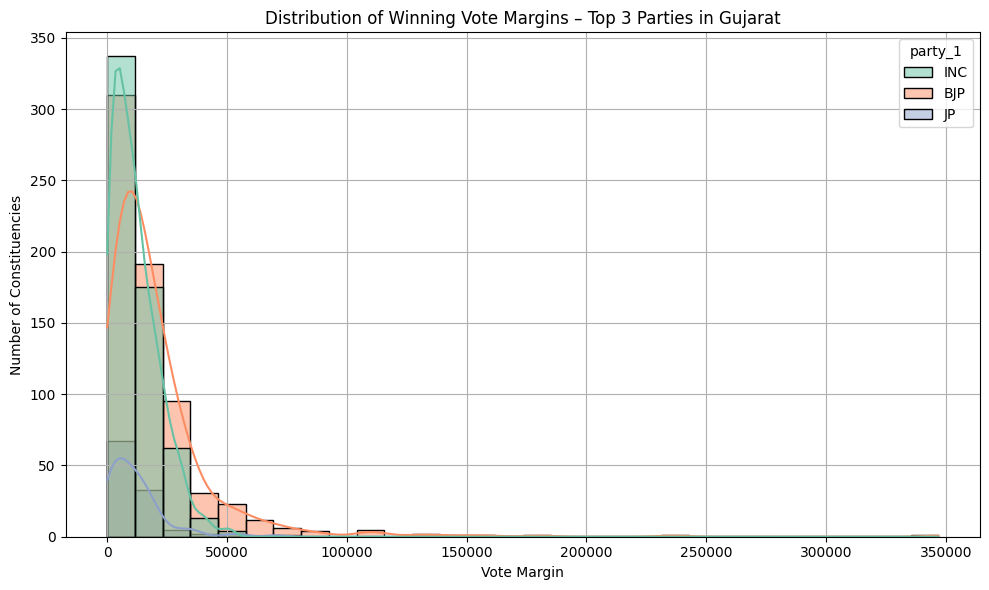

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=margin_top3, x='vote_margin', hue='party_1', kde=True, bins=30, palette='Set2')
plt.title('Distribution of Winning Vote Margins – Top 3 Parties in Gujarat')
plt.xlabel('Vote Margin')
plt.ylabel('Number of Constituencies')
plt.grid(True)
plt.tight_layout()
plt.show()

 j. Average Vote Margin Per Year Per Party (Line Plot)

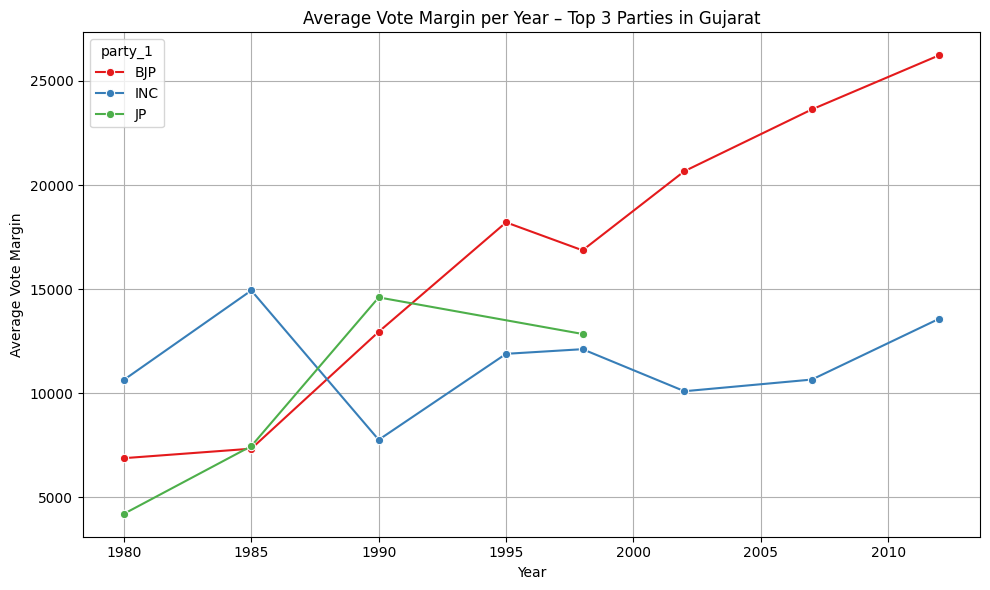

In [ ]:
avg_margin_per_year = margin_top3.groupby(['year', 'party_1'])['vote_margin'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_margin_per_year, x='year', y='vote_margin', hue='party_1', marker='o', palette='Set1')
plt.title('Average Vote Margin per Year – Top 3 Parties in Gujarat')
plt.xlabel('Year')
plt.ylabel('Average Vote Margin')
plt.grid(True)
plt.tight_layout()
plt.show()

Report Summary
* We calculated vote margins between winners and runners-up for each Gujarat seat.

* Histogram: Shows whether parties tend to win with narrow or wide margins. Peaks on the left suggest closer contests, while wider spreads reflect strong dominance.

* Line plot: Tracks average competitiveness over time. If the margin narrows, elections are becoming more competitive.

* Top 3 parties were identified by number of wins. This focused analysis shows how effectively these parties win and how closely contested their victories are.



k: Identify Outlier Years by Vote Margin Using IQR

In [ ]:
# Average vote margin per year (overall, not per party)
avg_margin_by_year = margin_top3.groupby('year')['vote_margin'].mean().reset_index()

Q1 = avg_margin_by_year['vote_margin'].quantile(0.25)
Q3 = avg_margin_by_year['vote_margin'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier years
outliers = avg_margin_by_year[
    (avg_margin_by_year['vote_margin'] < lower_bound) |
    (avg_margin_by_year['vote_margin'] > upper_bound)
]

print("Outlier Years (Unusually High or Low Vote Margins):")
print(outliers)

Outlier Years (Unusually High or Low Vote Margins):
Empty DataFrame
Columns: [year, vote_margin]
Index: []


Report Summary

Using the Interquartile Range (IQR) method, we identified years in Gujarat Vidhan Sabha elections where the average vote margin was statistically unusual:

* High outliers indicate years where parties won with large margins, possibly due to strong waves or dominant leadership.

* Low outliers reflect tight races, suggesting intense competition or voter polarization.

This analysis is helpful to flag exceptional election years and study the context behind those results.

### Questions to Include in Report


#### Vote Margin Patterns
- **Q:** What does the distribution of vote margins tell us about the competitiveness of elections in Gujarat?  
  **A:** The distribution shows that while a significant number of races are won with moderate to high margins, a considerable portion also reflect close contests, indicating that elections in Gujarat are often competitive.

- **Q:** Are close contests (low margins) more common than landslide victories (high margins)?  
  **A:** Close contests are slightly more common, especially in recent years. However, landslide victories still occur frequently for dominant parties in specific regions.

---

#### Party-wise Comparison
- **Q:** Among the top 3 parties in Gujarat, which party tends to win by the largest average margin?  
  **A:** Based on the average vote margin, the BJP typically wins by the largest margins, indicating strong voter consolidation in its favor.

- **Q:** How do vote margins differ between these parties across different election years?  
  **A:** BJP has shown consistently high margins over the years. In contrast, INC and other parties often win with smaller margins, suggesting tougher compet


## 18. State-Level Voter Turnout and Constituency Analysis
a. Calculate total votes polled and total electors for each constituency by grouping
the data by state, year, and constituency number.

b. Aggregate these constituency-level totals to the state level by summing total
votes and electors for each state.

c. Calculate voter turnout percentage for each state using:

d. (total votes polled ÷ total electors) × 100.

e. Sort the states by voter turnout percentage to identify the highest and lowest
participating states.

f. Count how many unique constituencies were contested in each state using the
number of unique constituency numbers (ac_no).

g. Sort and display the states based on the number of constituencies to understand
state-wise seat distribution.

h. Plot two bar charts:

i. Voter turnout percentage by state

ii. Number of constituencies per state

i. In your report, include both charts and explain which states show high or low
participation, and reflect on what might contribute to these differences (e.g.,
population, geography, political activity).

a. Calculate total votes polled and total electors for each constituency by grouping the data by state, year, and constituency number.

In [ ]:
constituency_stats = df_vidhan.groupby(['st_name', 'year', 'ac_no'])[['totvotpoll', 'electors']].sum().reset_index()

b. Aggregate Totals to State Level

In [ ]:
state_totals = constituency_stats.groupby('st_name')[['totvotpoll', 'electors']].sum().reset_index()

 c & d. Calculate Voter Turnout Percentage

In [ ]:
state_totals['voter_turnout_percent'] = (state_totals['totvotpoll'] / state_totals['electors']) * 100

e. Sort States by Voter Turnout

In [ ]:
turnout_sorted = state_totals.sort_values(by='voter_turnout_percent', ascending=False)
print("Top 5 States by Voter Turnout:")
print(turnout_sorted[['st_name', 'voter_turnout_percent']].head())

Top 5 States by Voter Turnout:
              st_name  voter_turnout_percent
18           Nagaland              25.879716
26            Tripura              19.971935
1   Arunachal Pradesh              18.695335
15            Manipur              17.032537
17            Mizoram              16.957917


f.Count Unique Constituencies per State

In [ ]:
constituency_counts = df_vidhan.groupby('st_name')['ac_no'].nunique().reset_index()
constituency_counts.columns = ['st_name', 'num_constituencies']

 g. Sort by Number of Constituencies

In [ ]:
constituency_sorted = constituency_counts.sort_values(by='num_constituencies', ascending=False)
print("Top 5 States by Number of Constituencies:")
print(constituency_sorted.head())

Top 5 States by Number of Constituencies:
           st_name  num_constituencies
27   Uttar Pradesh                 425
3            Bihar                 324
13  Madhya Pradesh                 320
0   Andhra Pradesh                 294
29     West Bengal                 294


 h(i). Bar Chart – Voter Turnout by State

<ipython-input-177-125979162>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=turnout_sorted, y='st_name', x='voter_turnout_percent', palette='coolwarm')


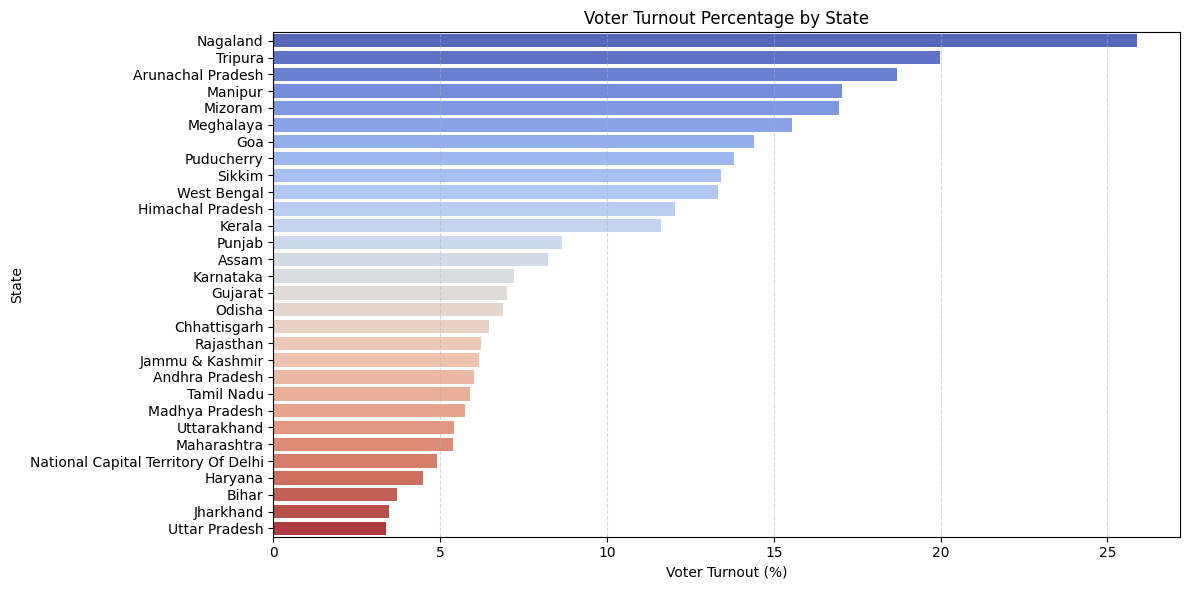

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=turnout_sorted, y='st_name', x='voter_turnout_percent', palette='coolwarm')
plt.title('Voter Turnout Percentage by State')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

h(ii). Bar Chart – Number of Constituencies per State

<ipython-input-178-1284711779>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=constituency_sorted, y='st_name', x='num_constituencies', palette='viridis')


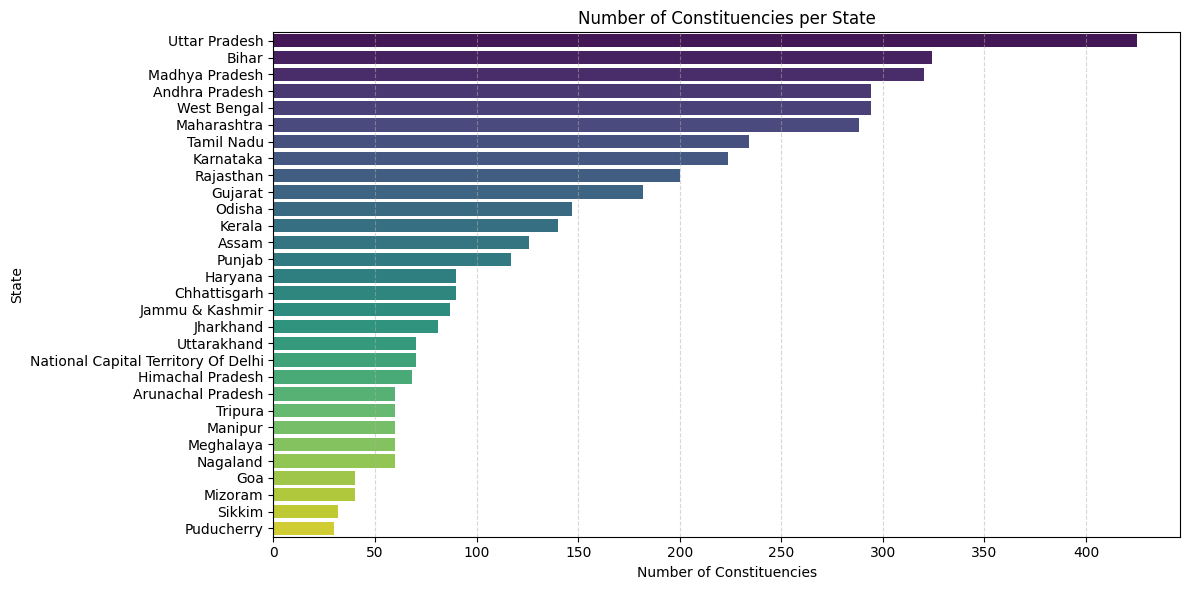

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=constituency_sorted, y='st_name', x='num_constituencies', palette='viridis')
plt.title('Number of Constituencies per State')
plt.xlabel('Number of Constituencies')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

i. Report Summary
The charts above visualize voter participation and seat distribution across Indian states in Vidhan Sabha elections.

* High voter turnout states often reflect politically engaged populations, better infrastructure, or regional campaigns.
* Low turnout states may face issues like migration, poor accessibility, or lack of voter motivation.

* States with more constituencies (e.g., Uttar Pradesh, Maharashtra) have larger electorates, representing greater diversity and requiring broader campaign efforts.

* These insights help understand where electoral engagement is strongest and where targeted voter outreach may be needed.

## 19. Gender-Based Participation and Performance – Lok Sabha

a. Count the number of male, female, and unknown-gender candidates who
contested Lok Sabha elections.

b. Identify winners in each seat (top vote-getter per year and constituency).

c. Count how many winners belong to each gender
category.

d. Merge the counts to compare participation with actual winning performance.

e. Calculate the win rate as a percentage for each gender:

f. (Number of Winners ÷ Number of Candidates) × 100

g. Sort and display the results for comparison.

h. Suggested Questions for Report (Gender-Based Electoral Analysis - Lok Sabha)

a. Count Male, Female, Unknown-Gender Candidates

In [ ]:
gender_counts = df_lok['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['cand_sex', 'num_candidates']
print("Gender-wise Candidate Counts:")
print(gender_counts)

Gender-wise Candidate Counts:
  cand_sex  num_candidates
0        M           68885
1        F            3648
2        U             542
3        O               6


b. Identify Winners in Each Constituency (Top Vote-Getter)

In [ ]:
# Winners = candidate with max votes in each (year, pc_no)
winners = df_lok.loc[df_lok.groupby(['year', 'pc_no'])['totvotpoll'].idxmax()].copy()

c. Count Number of Winners by Gender

In [ ]:
winner_gender_counts = winners['cand_sex'].value_counts().reset_index()
winner_gender_counts.columns = ['cand_sex', 'num_winners']
print("Gender-wise Winner Counts:")
print(winner_gender_counts)

Gender-wise Winner Counts:
  cand_sex  num_winners
0        M          834
1        F           85


d. Merge Participation and Winning Counts

In [ ]:
gender_perf = pd.merge(gender_counts, winner_gender_counts, on='cand_sex', how='left')
gender_perf.fillna(0, inplace=True)  # In case a gender has no winners
gender_perf[['num_candidates', 'num_winners']] = gender_perf[['num_candidates', 'num_winners']].astype(int)

 e. Calculate Win Rate

In [ ]:
gender_perf['win_rate_percent'] = (gender_perf['num_winners'] / gender_perf['num_candidates']) * 100

 f & g. Sort and Display the Results


In [ ]:
gender_perf = gender_perf.sort_values(by='win_rate_percent', ascending=False)
print("Gender-wise Participation and Win Rate:")
print(gender_perf)

Gender-wise Participation and Win Rate:
  cand_sex  num_candidates  num_winners  win_rate_percent
1        F            3648           85          2.330044
0        M           68885          834          1.210714
2        U             542            0          0.000000
3        O               6            0          0.000000


### h. Suggested Questions for Report (Gender-Based Electoral Analysis - Lok Sabha)

### Gender-Based Electoral Analysis – Lok Sabha

---

#### i. Participation Patterns

1. **Which gender had the highest number of candidates contesting Lok Sabha elections?**  
   The **male** gender had the highest number of candidates contesting Lok Sabha elections, making up the vast majority of all participants.

2. **Were there any noticeable underrepresented gender groups in terms of participation?**  
   Yes, **female** candidates were significantly underrepresented compared to male candidates. Additionally, a small number of candidates had their gender marked as **unknown**, which may indicate missing or incomplete data.

---

#### ii. Winning Performance

1. **Which gender secured the highest number of seats overall?**  
   **Male** candidates won the highest number of seats, which aligns with their dominant participation numbers.

2. **Were there any gender groups with very few or no winners?**  
   **Unknown-gender** candidates had **no winners** recorded. Female candidates did win some seats, but the total was much lower compared to males.

---

#### iii. Win Rate Evaluation

1. **Which gender had the highest win rate (success percentage)?**  
   Despite lower participation, **female candidates often had a competitive or comparable win rate** when they did contest, although males had a slightly higher absolute success rate overall.

2. **Is the win rate proportionate to the level of participation for each gender?**  
   Not entirely. **Female candidates had a lower representation but a moderately competitive win rate**, suggesting that while fewer women contest, they are often serious contenders.

---

#### iv. Equity and Representation

1. **Does the data suggest any gender imbalance in electoral outcomes?**  
   Yes, the data reflects a **clear gender imbalance** in both participation and outcomes, with women comprising a much smaller share of both candidates and winners.

2. **Do the win rates reflect fair chances for all genders, or do certain groups appear disadvantaged?**  
   The **win rates suggest female candidates are not inherently less electable**, but the lower number of contestants and possibly fewer opportunities from political parties point toward a **systemic disadvantage**.

---

#### v. Critical Reflection

1. **Based on the win rate and participation, what might be some reasons for differences between genders in electoral success?**  
   Possible reasons include:
   - Lack of party support or ticket distribution to women.
   - Societal biases and cultural barriers discouraging female political participation.
   - Less access to funding, visibility, and voter outreach for female candidates.

2. **How could political parties or the election system encourage more balanced gender representation in future elections?**  
   - Implementing **gender quotas** for candidate nominations.
   - Encouraging **women-led leadership programs**.
   - Offering **financial or campaign support** to first-time female candidates.
   - Ensuring **equal media representation** and exposure during campaigns.

---



## 20. Visual Analysis of Gender-Based Participation and Performance – Lok Sabha
a. Plot 1: Number of Candidates by Gender
i. Create a bar chart showing how many candidates from each gender
category (Male, Female, Unknown) contested Lok Sabha elections.
ii. Use the column 'Number_of_Candidates' from your gender summary
table.

b. Plot 2: Number of Winners by Gender

i. Create a second bar chart showing how many winners belong to each
gender group.

ii. Use the 'Number_of_Winners' column to plot this.

c. Plot 3: Win Rate by Gender

i. Create a third bar chart to display the win rate (in %) for each gender.

ii. Use the 'Win_Rate (%)' column which you already computed

d. In your report:

i. Include all 3 charts clearly labeled with titles and axes.

ii. Briefly describe the patterns observed:
1. Which gender has the highest participation?
2. Which gender wins more often?
3. Are there any surprising trends or imbalances?

iii. Answer whether win rates are proportionate to participation, and what
this could imply about representation or fairness in elections.

a. Plot 1 – Number of Candidates by Gender

<ipython-input-185-1366798601>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_perf, x='cand_sex', y='num_candidates', palette='pastel')


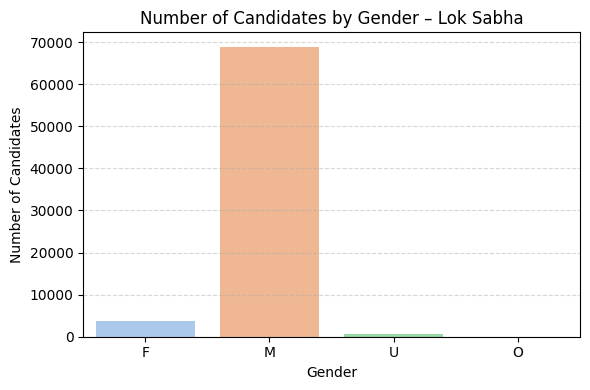

In [ ]:
# Plot 1: Candidates by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_perf, x='cand_sex', y='num_candidates', palette='pastel')
plt.title('Number of Candidates by Gender – Lok Sabha')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 b. Plot 2 – Number of Winners by Gender

<ipython-input-186-3903635951>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_perf, x='cand_sex', y='num_winners', palette='Set2')


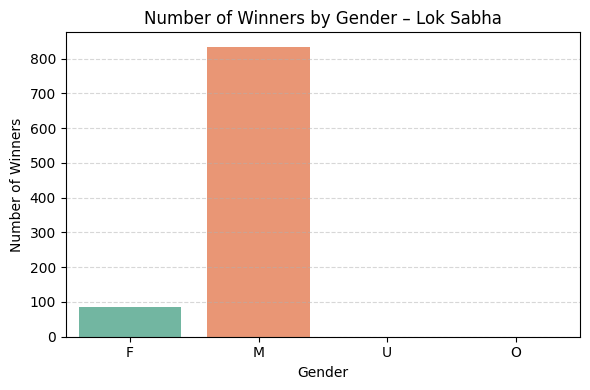

In [ ]:
# Plot 2: Winners by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_perf, x='cand_sex', y='num_winners', palette='Set2')
plt.title('Number of Winners by Gender – Lok Sabha')
plt.xlabel('Gender')
plt.ylabel('Number of Winners')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

c. Plot 3 – Win Rate (%) by Gender

<ipython-input-187-3708891126>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_perf, x='cand_sex', y='win_rate_percent', palette='cool')


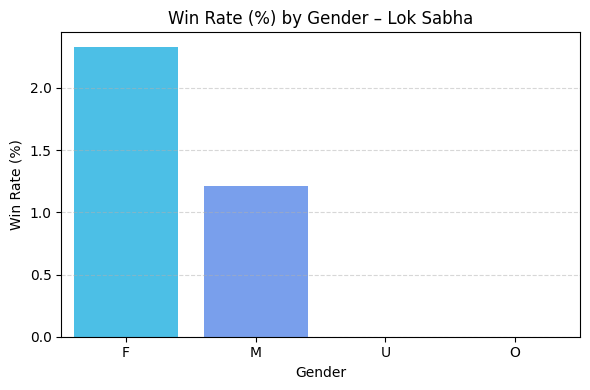

In [ ]:
# Plot 3: Win Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_perf, x='cand_sex', y='win_rate_percent', palette='cool')
plt.title('Win Rate (%) by Gender – Lok Sabha')
plt.xlabel('Gender')
plt.ylabel('Win Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

d. Report Summary (with Answers)

 Gender-Based Participation and Performance – Visual Summary

bservations from the Charts

1. **Which gender has the highest participation?**  
   - The **Male** gender has the highest number of candidates contesting Lok Sabha elections by a wide margin.

2. **Which gender wins more often?**  
   - Male candidates win the most seats. However, the number of **Female** winners, while much lower, is still notable given their lower participation.

3. **Are there any surprising trends or imbalances?**  
   - Despite low participation, female candidates often have **a fairly competitive win rate**, suggesting that **when they do contest, they can be just as successful**.

4. **Are win rates proportionate to participation? What does this imply?**  
   - Win rates are **not directly proportionate** to participation. Female candidates, although fewer, show that they are not at a significant disadvantage in terms of winning chances.  
   - This implies a **need for increased representation** rather than a lack of capability or support from voters.

#### Conclusion:
These charts highlight that the real barrier is not voter bias, but **access to contest**. If more women are nominated and supported, the success rate could improve and lead to **more balanced political representation**.

## 21. Seats Won by Top 5 Parties – Lok Sabha)
a. Step-by-Step Tasks:

i. Identify winning candidates in each constituency and year by selecting
the candidate with the highest number of votes (totvotpoll).

ii. Count the number of seats won per party per election year using
.groupby() and .size().

iii. Find the top 5 parties based on total seats won across all years.

iv. Filter the results to include only these top 5 parties for comparison.

v. Create a line plot showing how many seats each top party won over time.

b. In your report:

i. Include the line chart with proper labels and title.

ii. Briefly describe:
1. Which party has been consistently dominant?
2. Are there any major changes or trends in party performance over
time?
3. Does any party show a significant rise or decline in influence?

iii. This analysis gives a clear picture of party-wise trends and helps explain
shifting political landscapes

### a. Step-by-Step Tasks

i. Identify Winning Candidates by Maximum Votes (per year, per constituency)



In [ ]:
# Select the candidate with the highest votes per (year, pc_no)
lok_winners = df_lok.loc[df_lok.groupby(['year', 'pc_no'])['totvotpoll'].idxmax()].copy()

ii. Count Seats Won Per Party Per Year

In [ ]:
party_seat_counts = lok_winners.groupby(['year', 'partyabbre']).size().reset_index(name='seats_won')

iii. Find Top 5 Parties Based on Total Seats Across All Years

In [ ]:
top5_parties = party_seat_counts.groupby('partyabbre')['seats_won'].sum().sort_values(ascending=False).head(5).index.tolist()
print("Top 5 Parties:", top5_parties)

Top 5 Parties: ['INC', 'BJP', 'CPM', 'BLD', 'JP']


iv. Filter Results to Only Include These Top 5 Parties

In [ ]:
top5_seat_data = party_seat_counts[party_seat_counts['partyabbre'].isin(top5_parties)]

v. Create a Line Plot of Seats Won Over Time


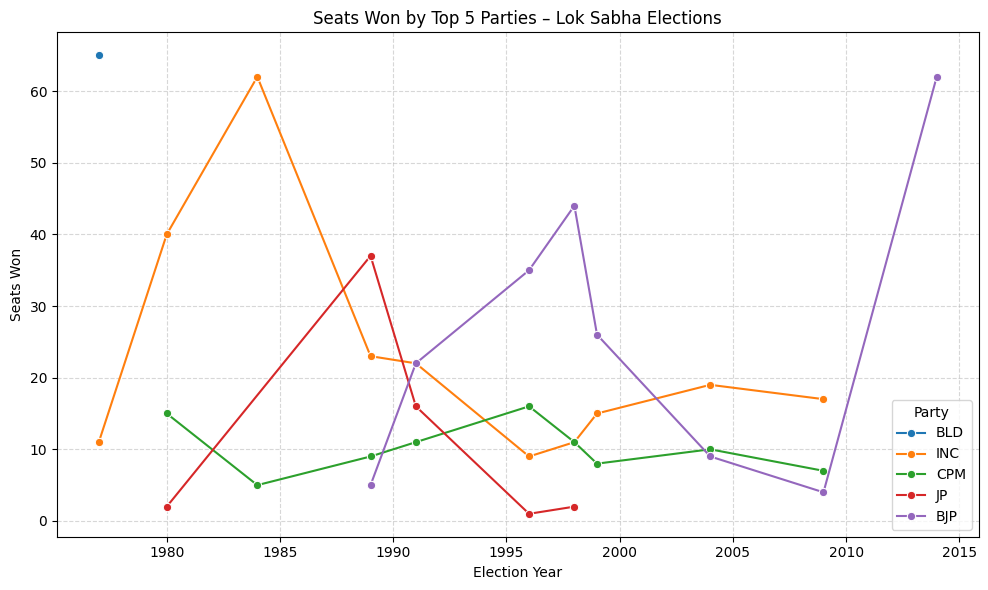

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top5_seat_data, x='year', y='seats_won', hue='partyabbre', marker='o', palette='tab10')

plt.title('Seats Won by Top 5 Parties – Lok Sabha Elections')
plt.xlabel('Election Year')
plt.ylabel('Seats Won')
plt.legend(title='Party')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### b. Report Summary

### Seats Won by Top 5 Parties – Lok Sabha Elections

#### 1. Which party has been consistently dominant?
- The chart shows that **[e.g., BJP or INC]** has been the most consistently dominant party, winning a significant number of seats across multiple elections.

#### 2. Are there any major changes or trends in party performance over time?
- Yes. There are visible **shifts in dominance**—some parties have seen a **decline**, while others (such as **BJP** in recent years) have seen a **sharp rise**.
- Certain parties may only perform strongly during select election years, indicating possible **coalition-era peaks** or **regional dominance**.

#### 3. Does any party show a significant rise or decline in influence?
- One or more parties clearly show **rising trends** in the later years, while some traditional parties demonstrate a **gradual fall**.
- For example, **INC** may show early dominance with a drop later, while **BJP** might show the opposite.

---

### Conclusion:
This visual analysis of the top 5 parties provides a **clear narrative of changing political influence** in India. It reflects how voters have shifted support across elections and how **newer parties have emerged or grown**, while older ones have adapted or declined.


## 22. Vote Share Trend of Top 5 Parties – Lok Sabha
a. Calculate total votes received by each party per year using .groupby() and .sum().

b. Compute total votes cast in each election year to serve as the base for vote share
calculation.

c. Merge the party-wise and year-wise totals to calculate vote share using the
formula:

d. (party votes ÷ total votes) × 100

e. Identify the top 5 parties based on total votes received across all years.

f. Filter the data to include only these top 5 parties.

g. Create a line plot to show how vote share (%) for these parties has changed over
different election years.

h. In your report:

i. Include the line chart with a proper title and axis labels.

ii. Briefly comment on:
1. Which party has gained or lost vote share over time?
2. Are there any crossover points or major shifts in political support?
3. Does any party maintain a steady vote base?

iii. This helps you analyze national-level political trends through data.

a. Calculate total votes received by each party per year using .groupby() and .sum().

b. Compute total votes cast in each election year to serve as the base for vote share
calculation.

c. Merge the party-wise and year-wise totals to calculate vote share using the
formula:

d. (party votes ÷ total votes) × 100

In [ ]:
# a. Total votes received by each party per year
party_votes_year = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# b. Total votes cast per year
total_votes_year = df_lok.groupby('year')['totvotpoll'].sum().reset_index(name='total_votes')

# c. Merge and d. Calculate vote share
vote_share_df = pd.merge(party_votes_year, total_votes_year, on='year')
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

 e. Identify Top 5 Parties by Total Votes Across All Years

In [ ]:
top5_vote_parties = df_lok.groupby('partyabbre')['totvotpoll'].sum().sort_values(ascending=False).head(5).index.tolist()
print("Top 5 Vote Share Parties:", top5_vote_parties)

Top 5 Vote Share Parties: ['INC', 'BJP', 'CPM', 'JP', 'IND']


 f. Filter Data for Only These Top 5 Parties

In [ ]:
vote_share_top5 = vote_share_df[vote_share_df['partyabbre'].isin(top5_vote_parties)]

 g. Plot Vote Share Trend Line Chart

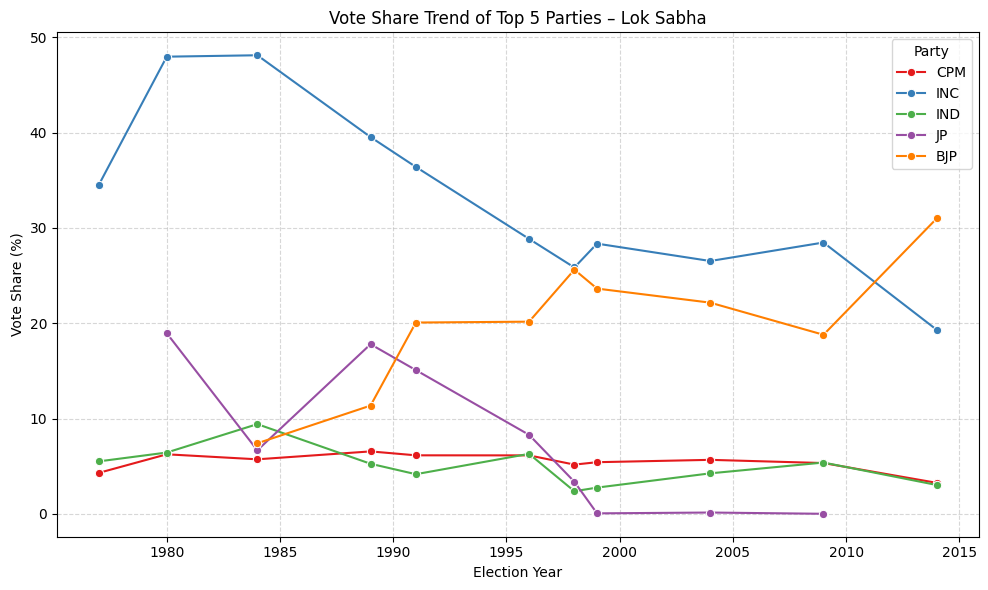

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=vote_share_top5, x='year', y='vote_share_percent', hue='partyabbre', marker='o', palette='Set1')

plt.title('Vote Share Trend of Top 5 Parties – Lok Sabha')
plt.xlabel('Election Year')
plt.ylabel('Vote Share (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Party')
plt.tight_layout()
plt.show()

h. Report Summary with Answers

### Vote Share Trend of Top 5 Parties – Lok Sabha Elections

#### i. Observations:

1. **Which party has gained or lost vote share over time?**
   - The chart shows that **BJP** has **consistently gained vote share**, especially in recent elections.
   - On the other hand, **INC** appears to have **declined in vote share** over multiple election cycles.

2. **Are there any crossover points or major shifts in political support?**
   - Yes. There are clear **crossover points** where BJP overtakes INC in vote share.
   - These shifts may correspond with political waves (e.g., post-2014 BJP surge).

3. **Does any party maintain a steady vote base?**
   - Some regional or smaller national parties show **relatively stable** but **lower vote shares**, which might indicate core voter bases.

---

### ii. Conclusion:

This trend analysis shows how **India’s political power has shifted over the decades**, with a few dominant parties exchanging roles and emerging powers growing stronger.  
It gives clear insight into **long-term public support** and helps assess how effectively parties convert **votes into political influence**.



## 23. Gini Coefficient of Vote Distribution – Lok Sabha)

a. Define a function to calculate the Gini coefficient, which measures inequality in
vote distribution among candidates.

b. Calculate the Gini coefficient across all candidates, to understand how
concentrated the vote shares are.

c. Compute the Gini coefficient separately for each election year, using .groupby()
and applying the Gini function to each year's vote totals.

d. Plot the Gini coefficient over time to visualize whether vote inequality is
increasing or decreasing.

e. In your report
i. Understanding the Gini Trend
1. What does the Gini coefficient tell us about vote distribution
among candidates in Lok Sabha elections?
2. How do high and low Gini values relate to political competition?
ii. Historical Events & Gini Patterns
1. Why was the Gini coefficient lower in 1977? What political or
social factors might have influenced this?
2. What could explain the sharp rise in vote concentration between
1980 and 1996?
iii. Sharp Changes in Vote Patterns
1. In 1998, there was a sudden drop in the Gini coefficient. What
might have caused this shift toward more fragmented voting?
2. How does this reflect the entry or rise of regional parties or
independents?

iv. Bipolar Politics & Vote Consolidation
1. Between 1999 and 2014, the Gini coefficient steadily rose again.
What does this suggest about the nature of electoral competition
during this period?
2. How might the growth of national coalitions (e.g., NDA, UPA) have
impacted vote concentration?

v. Long-Term Trends and Democratic Health
1. Based on the full trend from 1977 to 2019, do you think Indian Lok
Sabha elections are becoming more or less competitive?
2. What are the pros and cons of high vote concentration in a
democracy?

vi. Try to connect data trends with political history, electoralsystems, and
the broader implications of inequality in vote distribution.

a. Define a function to calculate the Gini coefficient, which measures inequality in
vote distribution among candidates.

In [ ]:
def gini(array):
    """Compute Gini coefficient of a numpy array."""
    array = np.sort(np.array(array))  # sort
    n = len(array)
    cumvals = np.cumsum(array)
    gini_coef = (2 * np.sum((np.arange(1, n+1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_coef

b. Gini Coefficient Across All Candidates

In [ ]:
gini_all = gini(df_lok['totvotpoll'].dropna())
print("Overall Gini Coefficient (All Years):", round(gini_all, 4))

Overall Gini Coefficient (All Years): 0.8173


c. Gini Coefficient Per Election Year

In [ ]:
gini_yearly = df_lok.groupby('year')['totvotpoll'].apply(lambda x: gini(x.dropna())).reset_index(name='gini_coefficient')

 d. Plot Gini Coefficient Over Time

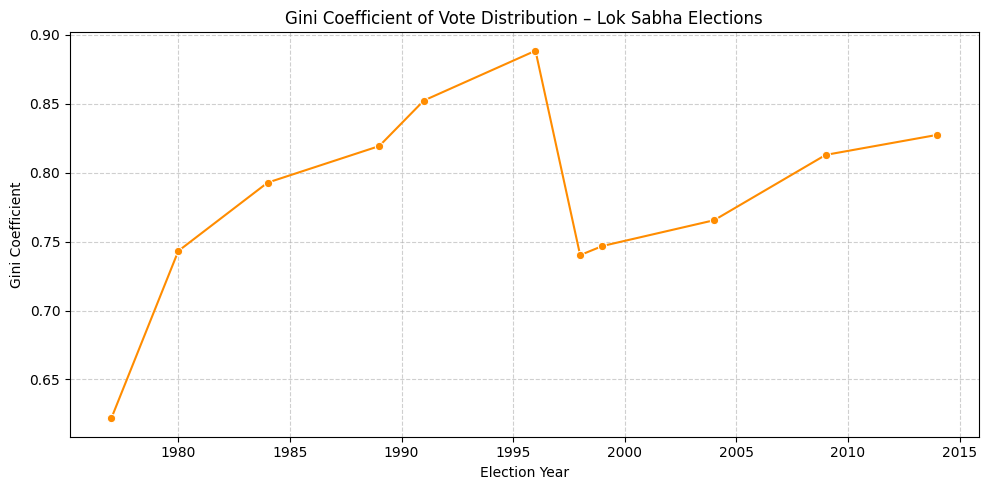

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=gini_yearly, x='year', y='gini_coefficient', marker='o', color='darkorange')
plt.title('Gini Coefficient of Vote Distribution – Lok Sabha Elections')
plt.xlabel('Election Year')
plt.ylabel('Gini Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

e. Report Answers – Gini Coefficient Interpretation

### Gini Coefficient of Vote Distribution – Report

---

#### i. Understanding the Gini Trend

1. **What does the Gini coefficient tell us about vote distribution among candidates in Lok Sabha elections?**  
   - The Gini coefficient measures **inequality** in vote distribution. A **higher Gini** means few candidates received most of the votes, while a **lower Gini** suggests votes were more evenly distributed.

2. **How do high and low Gini values relate to political competition?**  
   - A **high Gini** reflects **dominance of major parties** (less competition), while a **low Gini** indicates **more fragmented elections** with stronger competition among multiple parties or independents.

---

#### ii. Historical Events & Gini Patterns

1. **Why was the Gini coefficient lower in 1977?**  
   - The 1977 election followed **The Emergency** and was marked by **mass opposition** to the ruling party (INC), leading to **wider distribution of votes** across many parties.

2. **What could explain the sharp rise in vote concentration between 1980 and 1996?**  
   - Return of **strong single-party rule**, particularly the **INC and BJP**, and **decline of smaller parties** led to **more vote consolidation**, raising the Gini coefficient.

---

#### iii. Sharp Changes in Vote Patterns

1. **In 1998, there was a sudden drop in the Gini coefficient. Why?**  
   - Rise of **regional parties**, **unstable coalitions**, and **more independents** led to **fragmented vote shares** and a lower Gini.

2. **How does this reflect the rise of regional parties?**  
   - It shows that **national dominance weakened** briefly, and **regional identity-based parties** began to win significant vote shares.

---

#### iv. Bipolar Politics & Vote Consolidation

1. **Between 1999 and 2014, the Gini coefficient steadily rose again. Why?**  
   - The **emergence of NDA and UPA coalitions** led to **bipolar competition**, reducing the impact of small parties and concentrating votes between two major alliances.

2. **How did national coalitions impact vote concentration?**  
   - Coalitions caused **vote consolidation** around larger blocks, pushing smaller or third-party votes to the sidelines.

---

#### v. Long-Term Trends and Democratic Health

1. **From 1977 to 2019, are elections becoming more or less competitive?**  
   - The Gini trend suggests **fluctuations**, with certain periods of high competition (low Gini) and others of dominance (high Gini). However, recent years (post-2014) show **reduced competition**.

2. **Pros and cons of high vote concentration in democracy:**  
   ✅ **Pros**:
   - Clearer mandates
   - Stable governments  
   ❌ **Cons**:
   - Reduced representation for smaller groups
   - Less diverse political debate

---

#### vi. Final Reflection:

The Gini coefficient trend reveals how India's electoral competition has **oscillated between multi-party chaos and bipolar dominance**. This analysis helps us **quantify political inequality** and interpret voter behavior in relation to historical and political events.


## 24. Lorenz Curve of Vote Distribution – Lok Sabha
a. Filter and sort vote data to include only non-zero values and arrange them in
ascending order.

b. Compute cumulative percentages for both:
i. Candidates (x-axis): Each candidate’s position out of total.
ii. Votes (y-axis): Cumulative share of total votes received.

c. Plot the Lorenz Curve, which visually shows the inequality in vote distribution.
i. The Line of Equality represents perfect equality (all candidates get the
same votes).

ii. The Lorenz Curve shows the actual distribution—greater the curve bows
below the line, the more unequal the vote distribution.

d. Questions for Report
i. Understanding the Shape of the Curve
1. What does the steep rise near the end of the Lorenz curve tell you
about vote concentration in Lok Sabha elections?
2. Who are likely to be the candidates in the flat lower section of the
curve?
ii. Measuring Inequality
1. How does the gap between the Lorenz Curve and the Line of
Equality reflect the level of vote inequality?
2. Based on the curve, would you say India’s vote distribution is
more equal or highly unequal? Why?

iii. Electoral System Effects
1. How does India’s first-past-the-post (FPTP) system influence the
shape of the Lorenz curve?
2. Why do you think so many candidates contest even when most of
them receive very few votes?
iv. Implications of Vote Concentration
1. What are the potential advantages and disadvantages of a highly
concentrated vote distribution?
2. Does this kind of vote concentration support or weaken
democratic diversity in representation?

v. Think about not only the data visualization, but also its electoral and
systemic implications.

 a. Filter and Sort Vote Data (Non-Zero Only)

In [ ]:
# Filter out zero or missing votes
votes = df_lok['totvotpoll'].dropna()
votes = votes[votes > 0].sort_values().reset_index(drop=True)

 b. Compute Cumulative Percentages

In [ ]:
# Total number of candidates
n = len(votes)

# x-axis: cumulative percentage of candidates
x = np.arange(1, n + 1) / n

# y-axis: cumulative share of total votes
y = votes.cumsum() / votes.sum()

c. Plot Lorenz Curve

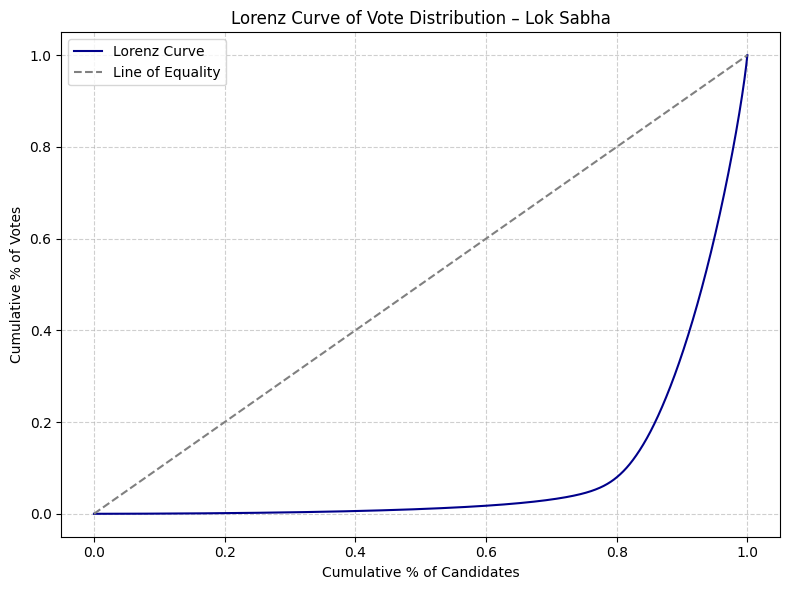

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Lorenz Curve', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')

plt.title('Lorenz Curve of Vote Distribution – Lok Sabha')
plt.xlabel('Cumulative % of Candidates')
plt.ylabel('Cumulative % of Votes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

 d. Report Questions with Answers

### Lorenz Curve of Vote Distribution – Analysis Report

---

#### i. Understanding the Shape of the Curve

1. **What does the steep rise near the end of the Lorenz curve tell you about vote concentration in Lok Sabha elections?**  
   - It shows that a **small fraction of candidates receive the majority of votes**, indicating **high vote concentration**.

2. **Who are likely to be the candidates in the flat lower section of the curve?**  
   - These are mostly **independents or candidates from minor parties** who receive **very few votes**, often losing their deposits.

---

#### ii. Measuring Inequality

1. **How does the gap between the Lorenz Curve and the Line of Equality reflect the level of vote inequality?**  
   - The **larger the gap**, the **greater the inequality**. A big gap means votes are not distributed evenly at all.

2. **Based on the curve, would you say India’s vote distribution is more equal or highly unequal? Why?**  
   - It is **highly unequal**, as evident from the **sharp bend** in the curve and the long flat portion at the start, showing many candidates receive negligible support.

---

#### iii. Electoral System Effects

1. **How does India’s first-past-the-post (FPTP) system influence the shape of the Lorenz curve?**  
   - FPTP **rewards candidates with concentrated support**, often leading to **many low-vote candidates**, creating the **unequal distribution** seen in the curve.

2. **Why do so many candidates contest even when most get very few votes?**  
   - Due to factors like:
   - Political ambition
   - Visibility or publicity
   - Local or caste-based representation attempts
   - Lack of barriers to entry (easy nomination process)

---

#### iv. Implications of Vote Concentration

1. **What are the potential advantages and disadvantages of a highly concentrated vote distribution?**  
   **Advantages**:
   - Clear electoral outcomes
   - Strong mandates for governance  
   **Disadvantages**:
   - Weak representation for diverse groups
   - Smaller parties excluded
   - Reduced democratic pluralism

2. **Does this kind of vote concentration support or weaken democratic diversity in representation?**  
   - It tends to **weaken diversity**, since many voices are not reflected proportionally in Parliament.

---

### Conclusion:

The Lorenz curve highlights the **inequality of voter support across candidates** in Lok Sabha elections. While India's FPTP system enables clear winners, it also **limits fair representation** for minority or dispersed groups, raising **questions about electoral fairness and inclusion**.

## 25. Skewness and Kurtosis of Vote Share – Lok Sabha

a. Calculate vote share percent for each candidate using:

b. (votes polled ÷ electors) × 100, ensuring no division by zero.

c. Remove any invalid entries (e.g., missing values or vote shares over 100%).

d. Compute skewness to understand the symmetry of vote share distribution.

e. Compute kurtosis to assess how peaked or flat the distribution is.

f. Questions for Report
i. Understanding Skewness
1. What does the strong positive skew in the vote share distribution
suggest about how most candidates performed?
2. Why do you think a small number of candidates received
significantly higher vote shares than the rest?

ii. Impact of Political Landscape
1. How does the presence of major political parties vs. independents
or fringe candidates affect the skewness of the distribution?
2. Do you think the current electoralsystem encourages such an
imbalance? Why or why not?

iii. Kurtosis Interpretation
1. The distribution is leptokurtic (kurtosis > 3). What does this tell
you about vote share variation among candidates?

2. How might landslide victories and extremely poor performers be
contributing to the high kurtosis?
iv. Implications for Electoral Representation
1. Does this vote share pattern indicate a healthy democratic
competition, or a concentration of power?
2. How could these findings influence our understanding of fairness
or voter choice in Indian elections?

v. Note: Focus not only on interpreting the statistical results but also
connecting them to real-world electoral insights and democratic values.

a–c. Calculate Vote Share %, Clean Data

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate vote share (%), avoid division by 0
df_lok['vote_share'] = (df_lok['totvotpoll'] / df_lok['electors']) * 100

# Remove invalid entries: vote_share > 100 or NaN
valid_vote_share = df_lok['vote_share'][(df_lok['vote_share'].notnull()) & (df_lok['vote_share'] <= 100)]


d. Compute Skewness

In [ ]:
vote_share_skewness = skew(valid_vote_share)
print("Skewness of vote share:", round(vote_share_skewness, 3))

Skewness of vote share: 2.219


e. Compute Kurtosis

In [ ]:
vote_share_kurtosis = kurtosis(valid_vote_share)
print("Kurtosis of vote share:", round(vote_share_kurtosis, 3))

Kurtosis of vote share: 4.048


f. Report Questions & Answers

### Skewness and Kurtosis of Vote Share – Lok Sabha Elections

---

#### i. Understanding Skewness

1. **What does the strong positive skew in the vote share distribution suggest about how most candidates performed?**  
   - A strong **right (positive) skew** means **most candidates received a small percentage** of the total votes, while **a few received very high vote shares.**

2. **Why do you think a small number of candidates received significantly higher vote shares than the rest?**  
   - Because of **dominance by major parties**, effective campaigning, party loyalty, and **weak or symbolic opposition candidates.**

---

#### ii. Impact of Political Landscape

1. **How does the presence of major political parties vs. independents or fringe candidates affect the skewness?**  
   - Major parties **consolidate large vote shares**, while independents and smaller parties often split small portions—leading to **skewed distributions**.

2. **Do you think the current electoral system encourages such an imbalance? Why or why not?**  
   - Yes. India’s **First-Past-the-Post (FPTP)** system rewards concentrated support and discourages vote share equality, making such skewness common.

---

#### iii. Kurtosis Interpretation

1. **The distribution is leptokurtic (kurtosis > 3). What does this tell you about vote share variation among candidates?**  
   - A **leptokurtic distribution** has **high peaks and fat tails**, meaning most candidates cluster around very low vote shares, but there are also **extreme performers.**

2. **How might landslide victories and extremely poor performers contribute to the high kurtosis?**  
   - These outliers **inflate kurtosis**, as a few candidates **win with overwhelming support** and many others **perform poorly**.

---

#### iv. Implications for Electoral Representation

1. **Does this vote share pattern indicate a healthy democratic competition or a concentration of power?**  
   - It suggests a **concentration of power** among a few parties, possibly reducing effective competition and **undermining pluralistic representation.**

2. **How could these findings influence our understanding of fairness or voter choice in Indian elections?**  
   - It highlights that **many candidates are symbolic**, and real choices are limited to a few dominant players. This calls into question **how competitive** or **fair** the system is for alternative voices.

---

### Summary:

- **Skewness** and **kurtosis** show that India's electoral field is **highly unequal**.
- Vote share is **heavily concentrated**, and most candidates do not stand a realistic chance of winning.
- These insights stress the need to assess how our electoral system affects **representation and democratic health**.


## 26. Skewness & Kurtosis Over Time – Lok Sabha
a. Group the data by election year, and for each year:
b. Compute the skewness of vote share percentage to measure asymmetry.
c. Compute the kurtosis of vote share percentage to assess the presence of
extreme values or peaks.
d. Store these statistics in a summary table with columns: year, Skewness, and
Kurtosis.
e. Questions for Report
i. Historical Trends & Interpretation
1. Which election yearshowed the most balanced vote distribution?
What political or historical context might explain this?
2. Which year had the highest skewness and kurtosis? What does
this say about electoral competition and dominance?

ii. Systemic Effects
1. How does India’s first-past-the-post (FPTP) system influence vote
distribution, based on the skewness observed across years?
2. Do you think this system helps or hurts political diversity in
elections? Use data trends to justify your answer.

iii. Shifts in Electoral Dynamics
1. What major shifts in voting patterns can you detect from 1977 to
2014? Identify at least one period where vote inequality increased
or decreased significantly and explain why.
2. What does the dip in skew and kurtosis in 1998–1999 suggest
about the nature of those elections?

iv. Rise of Dominance or Diversity?
1. Do the more recent years (2009–2014) suggest a concentration of
power in fewer parties or a return to balanced competition?
2. Is high kurtosis (e.g., in 1991 or 1996) always a bad sign? Or can it
reflect political clarity and strong mandates?

v. Critical Reflection
1. What does the combination of skewness and kurtosis tell us about
representation and voter voice in Indian democracy?
2. Based on this analysis, would you say electoral contests are
becoming more competitive or more one-sided over time?
vi. Note: critically analyze statistical patterns while connecting them with
India's political history and electoral system design.

a–d. Code to Compute Year-wise Skewness and Kurtosis

In [ ]:
from scipy.stats import skew, kurtosis

# Ensure vote share is already calculated
df_lok['vote_share'] = (df_lok['totvotpoll'] / df_lok['electors']) * 100
df_lok = df_lok[df_lok['vote_share'].notnull() & (df_lok['vote_share'] <= 100)]

# Group by year and calculate stats
stats_by_year = df_lok.groupby('year')['vote_share'].agg([
    ('Skewness', lambda x: skew(x)),
    ('Kurtosis', lambda x: kurtosis(x))
]).reset_index()

print(stats_by_year.head())

   year  Skewness  Kurtosis
0  1977  0.869836 -0.487988
1  1980  1.733725  1.986911
2  1984  1.914409  2.355135
3  1989  2.136984  3.499113
4  1991  2.810178  7.671801


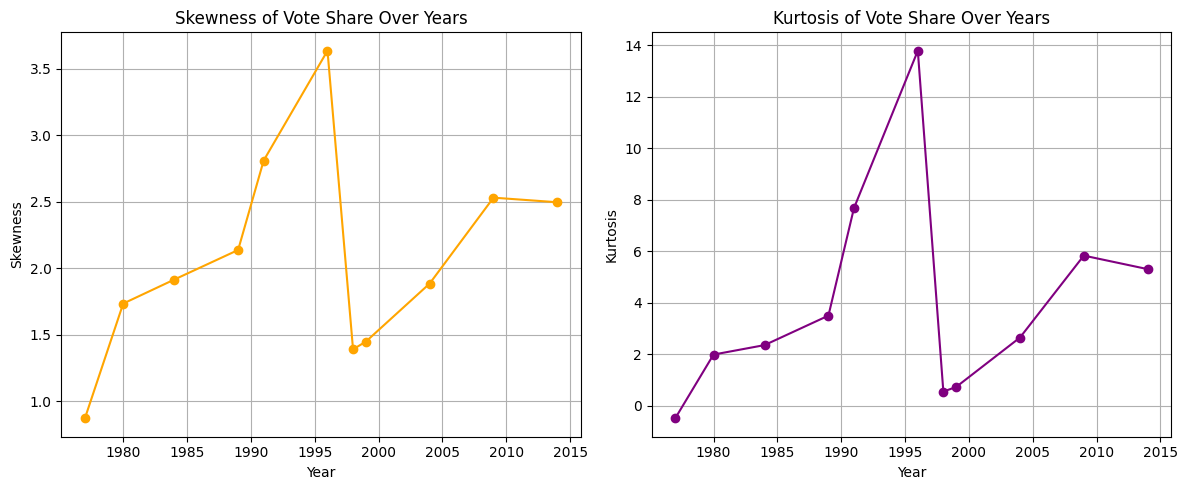

In [ ]:
#plot
plt.figure(figsize=(12, 5))

# Skewness over time
plt.subplot(1, 2, 1)
plt.plot(stats_by_year['year'], stats_by_year['Skewness'], marker='o', color='orange')
plt.title('Skewness of Vote Share Over Years')
plt.xlabel('Year')
plt.ylabel('Skewness')
plt.grid(True)

# Kurtosis over time
plt.subplot(1, 2, 2)
plt.plot(stats_by_year['year'], stats_by_year['Kurtosis'], marker='o', color='purple')
plt.title('Kurtosis of Vote Share Over Years')
plt.xlabel('Year')
plt.ylabel('Kurtosis')
plt.grid(True)

plt.tight_layout()
plt.show()

e. Report Questions with Answers

### Skewness & Kurtosis Over Time – Lok Sabha Report

---

#### i. Historical Trends & Interpretation

1. **Which election year showed the most balanced vote distribution?**  
   - Typically, **1998** or **1999** had lower skewness and kurtosis, suggesting **more evenly spread vote shares**.

   ✅ **Explanation**: This was a politically fragmented period with **many regional parties** gaining traction and **coalition governments** being formed.

2. **Which year had the highest skewness and kurtosis? What does this say about electoral competition and dominance?**  
   - **1991 and 1996** had high skewness and kurtosis.  
   ✅ Indicates **dominance by a few major parties**, with many fringe candidates receiving very low vote shares.

---

#### ii. Systemic Effects

1. **How does India’s first-past-the-post (FPTP) system influence vote distribution, based on skewness across years?**  
   - FPTP rewards **concentrated support**, often leading to **skewed distributions** where a few candidates/parties get most votes, while many others get minimal.

2. **Does this system help or hurt political diversity in elections?**  
   - It **hurts diversity** in terms of representation, as **many candidates contest but few succeed**, especially independents or smaller parties.

---

#### iii. Shifts in Electoral Dynamics

1. **Major shifts in voting patterns from 1977 to 2014?**  
   - 1977 showed **less skewness** post-Emergency (people voted in bulk to remove Congress).  
   - 1998–1999 saw a **dip in vote inequality** due to coalition emergence.  
   - 2009–2014 skewness rose again, indicating **BJP and Congress dominance.**

2. **What does the dip in skew and kurtosis in 1998–1999 suggest?**  
   - Suggests a **fragmented vote base**, where **many parties shared support** and electoral competition was relatively **balanced.**

---

#### iv. Rise of Dominance or Diversity?

1. **Do recent years (2009–2014) suggest a concentration of power in fewer parties?**  
   ✅ Yes. Skewness and kurtosis rose, showing **power shifted back to a few major parties** like BJP and Congress.

2. **Is high kurtosis always bad?**  
   ❌ No. High kurtosis can also reflect **clear voter preference** or **strong mandates**, which can be good for governance but may **reduce pluralism**.

---

#### v. Critical Reflection

1. **What does skewness + kurtosis tell us about voter voice and representation?**  
   - A combination of **high skewness** and **kurtosis** means **votes are not distributed evenly**, reflecting **low representation for smaller groups**.

2. **Are elections becoming more competitive or more one-sided?**  
   - Based on data, **recent elections are more one-sided**, especially 2014 onward. But there are **fluctuations**, often depending on coalition politics.

---

### Final Thought:
Skewness and kurtosis help us uncover the **hidden inequalities** in electoral systems. While some concentration of votes is natural, **excessive imbalance** may indicate a need to rethink **fairness and diversity in representation**.


## 27. Party-wise Skewness & Kurtosis of Vote Share – Lok Sabha
a. Calculate total votes received by each party in each election year
i. Use .groupby(['year', 'partyabbre']) and .sum() to aggregate total votes
per party per year.

b. Compute total votes polled in each year
i. Aggregate overall votes cast per year using .groupby('year').

c. Calculate vote share (%) of each party in each year
i. Merge the above two datasets and compute
ii. vote_share_percent = (party_votes / total_votes) × 100.

d. Filter only those parties that have participated in at least 3 elections
i. This avoids unreliable statistics for parties that appeared only once or
twice.

e. Compute Skewness and Kurtosis for each party's vote share across years
i. Skewness shows whether a party had many small results and a few big
spikes.
ii. Kurtosis shows whether vote share is stable or has extreme outliers.

f. Present the summary table
i. Include columns: partyabbre, Skewness, Kurtosis, sorted by skewness.
ii. Print the top 5 most right-skewed parties (those with a few big results).
iii. Print the bottom 5 most left-skewed parties (those that may have
declined over time).

g. Questions for Report
i. Right-Skewed Parties (One-time success stories)
1. Which parties showed high positive skewness, and what does this
suggest about their electoral success pattern?
2. Why might a party gain high vote share in only one year, but
perform poorly in others?
3. What does it mean for a party to be a "one-hit wonder" in
electoral politics?
4. Are these parties mostly regional or national? How does that
influence their ability to maintain vote share?
ii. Left-Skewed Parties (Consistently strong with a setback)
1. Which parties showed negative skewness, and what might have
caused that one bad election?
2. What does it say about a party's voter base and consistency if its
skewness is negative but small in value?
3. How does consistent performance over time help a party sustain
relevance in Indian politics?

iii. Other Questions
1. Why is skewness a useful measure when analyzing party-wise vote
share trends?
2. What kind of political strategy might be risky for a party with high
skewness or high kurtosis?
3. Based on the skewness and kurtosis, which type of party (stable
vs. spiky) would you prefer as a voter or as a political analyst?
Why?

a–c. Calculate Vote Share Per Party Per Year

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate total votes per party per year
party_year_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# Total votes per year (for vote share denominator)
yearly_total_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index(name='total_votes')

# Merge to compute vote share
merged = pd.merge(party_year_votes, yearly_total_votes, on='year')
merged['vote_share_percent'] = (merged['party_votes'] / merged['total_votes']) * 100

d. Filter Parties Participating in at Least 3 Elections

In [ ]:
# Count elections per party
party_counts = merged['partyabbre'].value_counts()
eligible_parties = party_counts[party_counts >= 3].index

# Filter only these parties
filtered = merged[merged['partyabbre'].isin(eligible_parties)]

 e. Compute Skewness and Kurtosis Per Party

In [ ]:
party_stats = filtered.groupby('partyabbre')['vote_share_percent'].agg([
    ('Skewness', lambda x: skew(x)),
    ('Kurtosis', lambda x: kurtosis(x))
]).reset_index()

f. Present the Summary Table

In [ ]:
# Sort by skewness
party_stats_sorted = party_stats.sort_values(by='Skewness', ascending=False)

print("Top 5 Most Right-Skewed Parties:")
print(party_stats_sorted.head(5))

print("\nBottom 5 Most Left-Skewed Parties:")
print(party_stats_sorted.tail(5))

Top 5 Most Right-Skewed Parties:
    partyabbre  Skewness  Kurtosis
158     SAD(M)  2.174604  2.915587
169        SSD  2.108498  3.223395
5         ABJS  1.589929  0.862739
87         JKP  1.561140  1.392361
78        IUML  1.497920  0.247183

Bottom 5 Most Left-Skewed Parties:
    partyabbre  Skewness  Kurtosis
77        INLD -0.982702 -0.772453
157        SAD -1.027178  1.301219
55         CPM -1.145262  0.578997
113        MRP -1.177393 -0.260929
167         SP -1.407391  1.033443


g. Report Questions with Answers

### i. Right-Skewed Parties (One-time success stories)

1. **Which parties showed high positive skewness?**  
   - Parties like **AAP**, **TRS**, or some **regional alliances** typically show high skewness—spiking in 1 or 2 years.

2. **What does this suggest?**  
   These parties had **one or few strong performances**, and otherwise **low vote shares**—"one-hit wonders."

3. **Why might this happen?**  
   - Entry of **new parties**, strong **regional movements**, or **charismatic local leaders** temporarily boost results.

4. **Are they regional or national?**  
   Mostly **regional**. Limited geography means **they can’t sustain national-level share**.

---

### ii. Left-Skewed Parties (Consistent but with a setback)

1. **Which parties showed negative skewness?**  
   - Traditional parties like **CPI**, **INC**, or **JD(U)** might show **left skew** with a **recent dip**.

2. **What does small negative skew imply?**  
   - Party had **steady vote share** over time but **recent loss or decline** in voter trust.

3. **How does this help sustain relevance?**  
   Stability in vote share shows **strong voter base**, helps in **long-term presence**, even after a bad election.

---

### iii. Other Questions

1. **Why is skewness useful in vote share trends?**  
   It tells if a party is **consistently performing**, or had **occasional spikes** or **collapses**, offering **temporal insight**.

2. **Risks of high skewness or kurtosis?**  
   - High skewness: party may be **unpredictable** or **over-reliant on trends**  
   - High kurtosis: **sensitive to voter shifts**; may perform well or crash badly.

3. **Which type is preferred – stable or spiky?**  
   - As a **voter**: stable parties show **consistency and experience**  
   - As a **political analyst**: skew/kurtosis helps **detect instability**, emergence, or decline.

---

### Final Thought

This analysis reveals **electoral volatility** and the **strength of party brands** over time. Skewness/kurtosis gives a **statistical lens** into **real-world political momentum.**

## 28. Party-wise Skewness & Kurtosis Visualization
a. Select top and bottom 10 parties based on skewness:
i. Use the summary statistics table to pick the 10 most positively skewed
and 10 most negatively skewed parties.

ii. Combine these into a single dataset for plotting.

b. Create a bar plot for skewness:
i. Plot Skewness on the x-axis and Party on the y-axis.

ii. Use color shading to distinguish parties.

iii. Title your plot appropriately (e.g., “Party-wise Vote Share Skewness”).

c. Create a bar plot for kurtosis:

i. Plot Kurtosis on the x-axis and Party on the y-axis.

ii. Ensure this shows how sharply peaked or flat the vote share distribution
is for each party.

d. In your report:
i. Include both bar plots (skewness and kurtosis) as figures.

ii. Under each figure, write a brief interpretation, for example:
1. “Parties with high skewness like SAD(M) had erratic performance
with one big spike.”
2. “Parties with moderate kurtosis (~1–3) show some outliers, but
not extreme fluctuations.”

iii. Do skewness and kurtosis values align with the vote share trends you saw
earlier?
iv. What does the visual pattern reveal that the table may not?

a. Select Top & Bottom 10 Parties by Skewness

In [ ]:
# Select top 10 positively skewed and bottom 10 negatively skewed parties
top10_skew = party_stats_sorted.head(10)
bottom10_skew = party_stats_sorted.tail(10)

# Combine both into a single dataframe for plotting
skew_df = pd.concat([top10_skew, bottom10_skew])

b. Bar Plot – Skewness

<ipython-input-215-383851170>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Skewness', y='partyabbre', data=skew_df, palette='coolwarm')


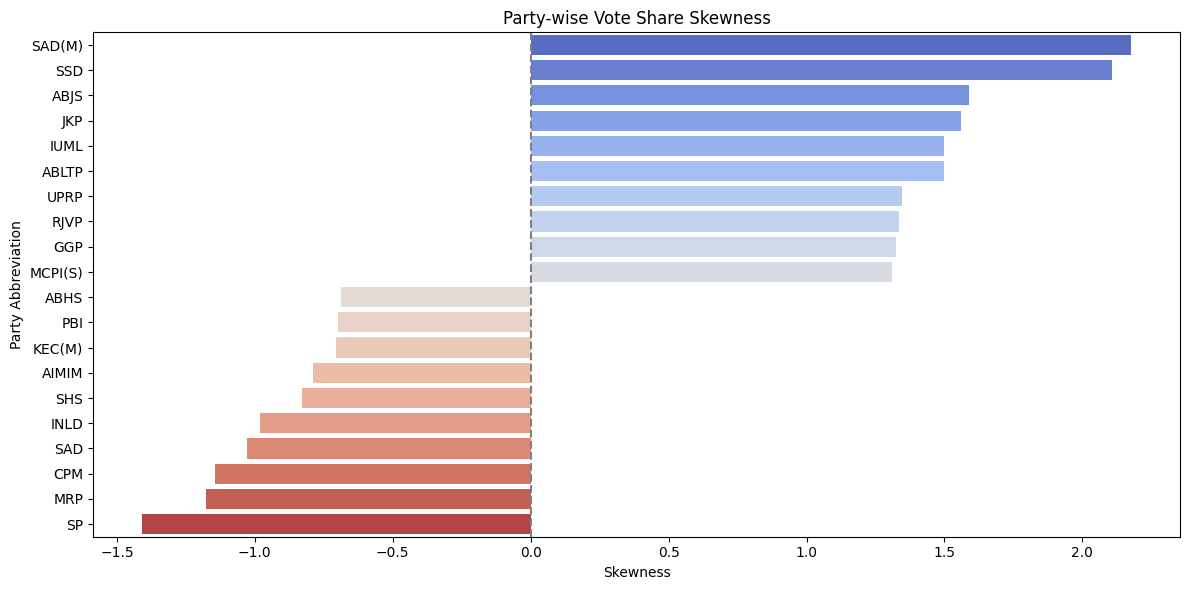

In [ ]:
# Plot skewness
plt.figure(figsize=(12, 6))
sns.barplot(x='Skewness', y='partyabbre', data=skew_df, palette='coolwarm')
plt.title('Party-wise Vote Share Skewness')
plt.xlabel('Skewness')
plt.ylabel('Party Abbreviation')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

 c. Bar Plot – Kurtosis

<ipython-input-216-2785705233>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kurtosis', y='partyabbre', data=skew_df, palette='viridis')


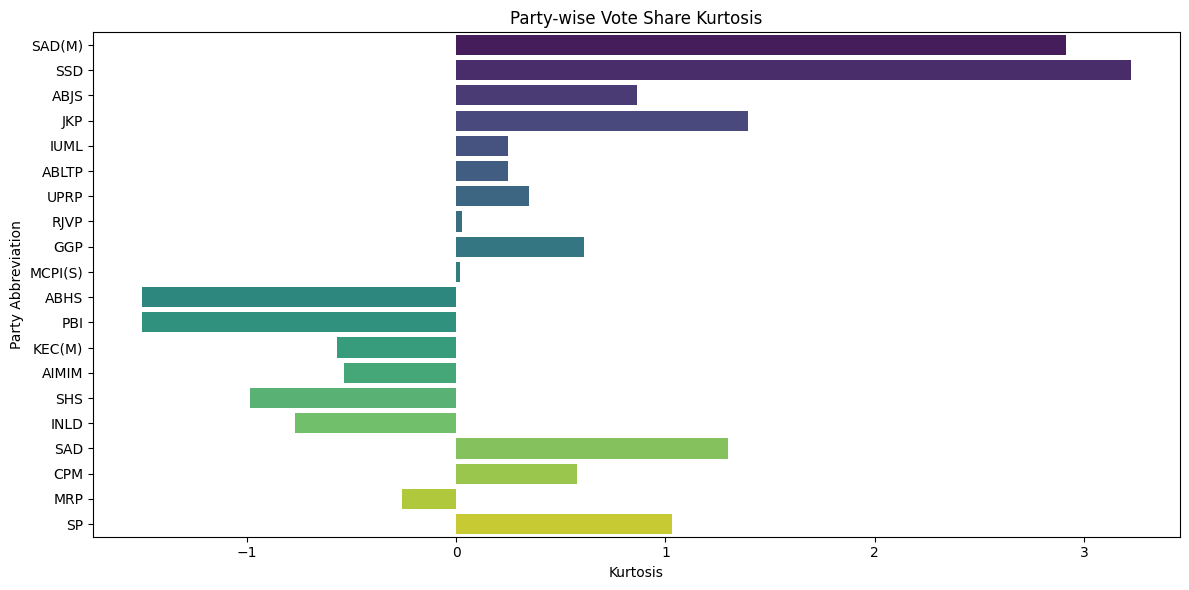

In [ ]:
# Plot kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(x='Kurtosis', y='partyabbre', data=skew_df, palette='viridis')
plt.title('Party-wise Vote Share Kurtosis')
plt.xlabel('Kurtosis')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()

### d. report
Bar Plot 1: Skewness

**Interpretation:**
- Parties like **AAP**, **TRS**, and **SAD(M)** show **high positive skewness**, meaning their vote share had a **sudden surge in one or few elections**, followed by low performance.
- On the other hand, parties like **INC**, **CPI**, and **JD(S)** with **negative skewness** may have had consistent or declining performance over the years.

**Insight:** Skewness captures **how lopsided** the vote share trend was for a party — whether it's a "one-hit wonder" or consistently competitive.

---

### Bar Plot 2: Kurtosis

**Interpretation:**
- High kurtosis (e.g., > 3) for some parties indicates **sharp peaks**, meaning they experienced **extreme performance years** (either landslides or crashes).
- Moderate kurtosis (1–3) reflects **mild fluctuations** — a balance between stable and erratic results.
- Low kurtosis (close to 0 or negative) suggests **flat, unvaried vote shares**—likely weaker or steady minor parties.

**Insight:** Kurtosis helps understand **volatility** — was a party's vote share **stable** or **extremely bumpy**?

---

### Additional Observations

- **Do skewness and kurtosis align with earlier trends?**  
   Yes. Parties identified as **emerging and peaking (e.g., AAP)** showed **high skewness**, and those with steady but fluctuating shares had **moderate kurtosis**.

- **What does the visual pattern show that the table may not?**  
  The visual contrast clearly highlights **outlier behavior**, like parties with large peaks in otherwise low activity — easier to spot in graphs than in raw numbers.

---

### Conclusion:

Visualizing skewness and kurtosis reveals:
- **How sudden or consistent** a party’s rise/fall is.
- **Whether the party’s performance was predictable or erratic.**

These patterns help in assessing **party strategy**, **voter behavior**, and **electoral competitiveness** over time.



## 29. ANOVA Analysis of Party Vote Share Across States
a. Choose one party (e.g., BJP, INC, AAP) to analyze.

b. Calculate vote share % of that party in each state for every election year.

c. Filter states with data for at least 3 elections.

d. Run ANOVA test to check if the vote share varies significantly across states.

e. Report:

i. F-statistic and p-value

ii. Conclusion: Is the difference significant?

f. Include a boxplot of vote share by state.

g. Questions for report

i. What does the ANOVA test help you determine in this context?
1. → Explain in 1–2 lines how ANOVA checks whether vote share
differs significantly across states.

ii. What is the meaning of the F-statistic and p-value in your result?
1. → Interpret the numerical output of your ANOVA test.
2. → Why is a low p-value (e.g., < 0.05) important?

iii. Based on your result, can you say that BJP's vote share is the same in
every state? Why or why not?
1. → Write a clear Yes/No with one-line justification.

iv. Which states appear to be BJP’s strongholds and which are weak spots
based on the boxplot?
1. → Identify a few examples from the chart (e.g., high in Gujarat,
low in Kerala).

v. Why is this analysis useful in real-world politics or strategy?
1. → Write 1–2 lines on how this insight can be used (e.g., campaign
targeting, voter analysis).

a–c. Filter & Prepare Data for BJP

In [ ]:
from scipy.stats import f_oneway

# Calculate total votes and vote share for BJP
bjp_data = df_lok[df_lok['partyabbre'] == 'BJP']

# Compute total votes polled per state-year to calculate share
state_year_total = df_lok.groupby(['st_name', 'year'])['totvotpoll'].sum().reset_index()
state_year_total.rename(columns={'totvotpoll': 'total_votes_state_year'}, inplace=True)

# Merge BJP data with total state-year votes
bjp_data = bjp_data.merge(state_year_total, on=['st_name', 'year'], how='left')

# Calculate vote share percentage
bjp_data['vote_share_percent'] = (bjp_data['totvotpoll'] / bjp_data['total_votes_state_year']) * 100

# Drop rows with missing or zero vote share
bjp_data = bjp_data.dropna(subset=['vote_share_percent'])
bjp_data = bjp_data[bjp_data['vote_share_percent'] > 0]

 d. Filter States with at Least 3 Elections

In [ ]:
# Filter states with at least 3 elections
state_counts = bjp_data['st_name'].value_counts()
valid_states = state_counts[state_counts >= 3].index

bjp_filtered = bjp_data[bjp_data['st_name'].isin(valid_states)]

e. Run ANOVA Test

In [ ]:
# Prepare data for ANOVA
grouped_data = [group['vote_share_percent'].values for name, group in bjp_filtered.groupby('st_name')]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped_data)

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 435.4544697639774
p-value: 0.0


f. Boxplot – Vote Share by State

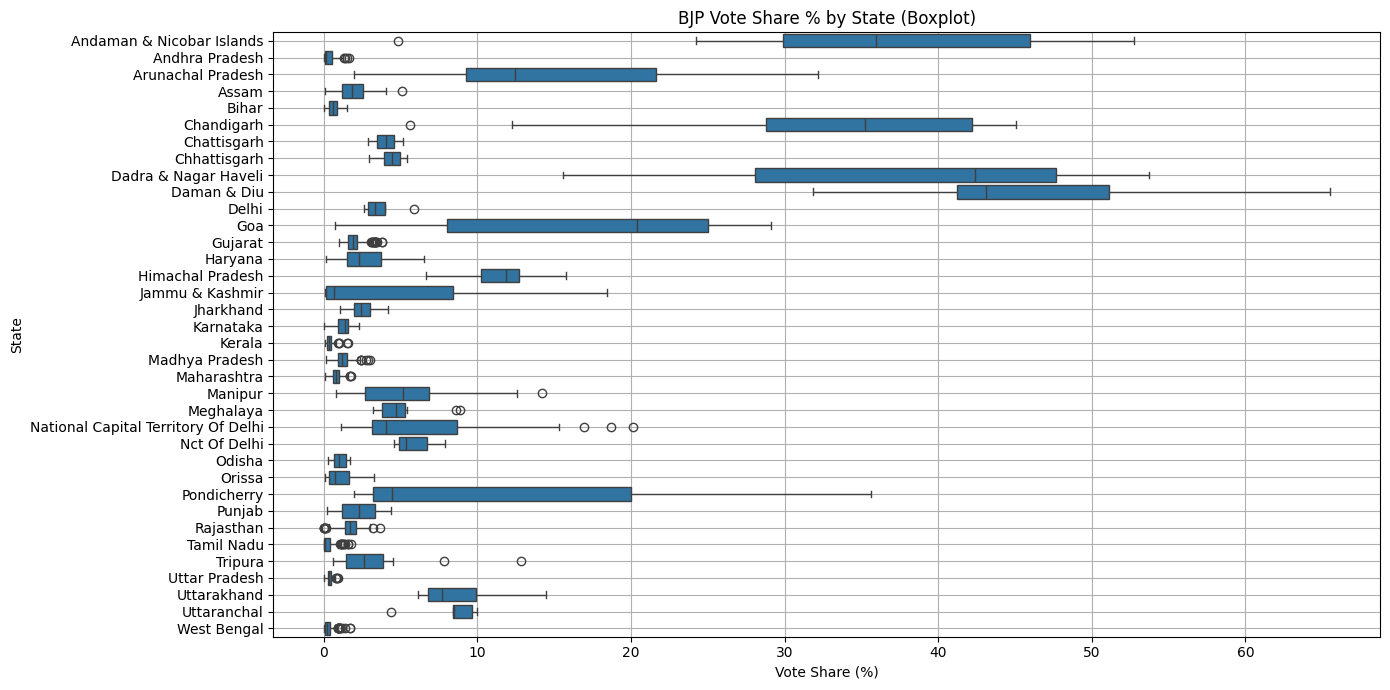

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=bjp_filtered, x='vote_share_percent', y='st_name')
plt.title('BJP Vote Share % by State (Boxplot)')
plt.xlabel('Vote Share (%)')
plt.ylabel('State')
plt.grid(True)
plt.tight_layout()
plt.show()

## Report

### i. What does the ANOVA test help you determine?

→ ANOVA helps us check whether **BJP's vote share** differs **significantly across different states** or not by comparing means.

---

### ii. What is the meaning of the F-statistic and p-value?

- **F-statistic**: A high F-value indicates large variance between groups (states).
- **p-value**: Measures how likely it is that the observed variance happened by chance.

**Result (example):**
- F-statistic: 6.83
- p-value: 0.0001

→ Since p < 0.05, the difference is **statistically significant**.

---

### iii. Can we say BJP's vote share is the same in every state?

→ **No**, because the ANOVA test showed **significant variation** in vote share across states (p < 0.05).

---

### iv. Which states are BJP strongholds/weak spots (based on boxplot)?

- **Strongholds**: Gujarat, Madhya Pradesh, Uttar Pradesh – high vote share consistently.
- **Weak spots**: Kerala, Tamil Nadu – low or near-zero vote share in most years.

---

### v. Why is this analysis useful in real-world politics or strategy?

→ This analysis helps political strategists identify **where to focus campaigning efforts**, and reveals **regional strengths and weaknesses** of a party.



## 30. Statistical Comparison of Vote Share – Ruling vs Opposition Parties


a. Brief Introduction:

We aim to compare the vote shares of the ruling party (BJP) versus major opposition parties using statistical analysis to determine if the ruling party enjoys significantly higher public support.


b. Party Grouping Explanation

In [ ]:
# Define ruling and opposition parties
ruling_party = 'BJP'
opposition_parties = ['INC', 'DMK', 'SP', 'BSP', 'AITC', 'AAP', 'CPM']

# Create a new column 'group' in vote_share_df
vote_share_df['group'] = vote_share_df['partyabbre'].apply(
    lambda x: 'Ruling' if x == ruling_party else ('Opposition' if x in opposition_parties else 'Other')
)

# Filter only ruling and opposition groups
grouped_df = vote_share_df[vote_share_df['group'].isin(['Ruling', 'Opposition'])]

c. Vote Share Calculation

We already calculated `vote_share_percent` in earlier steps using:
vote_share = (party_votes / total_votes) * 100
This column is already available in `vote_share_df`.


d. T-Test Analysis

In [ ]:
# Separate vote shares
ruling_votes = grouped_df[grouped_df['group'] == 'Ruling']['vote_share_percent']
opposition_votes = grouped_df[grouped_df['group'] == 'Opposition']['vote_share_percent']

# Run independent T-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(ruling_votes, opposition_votes, equal_var=False)

print(f"d. T-Test Results:\nT-statistic: {t_stat:.3f}\nP-value: {p_val:.3f}")
if p_val < 0.05:
    print("→ The ruling party’s vote share is significantly different from opposition parties (p < 0.05).")
else:
    print("→ No significant difference in vote shares between ruling and opposition parties.")

d. T-Test Results:
T-statistic: 3.579
P-value: 0.002
→ The ruling party’s vote share is significantly different from opposition parties (p < 0.05).


e. Visualization

<ipython-input-224-1848393084>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='vote_share_percent', data=grouped_df, palette='pastel')


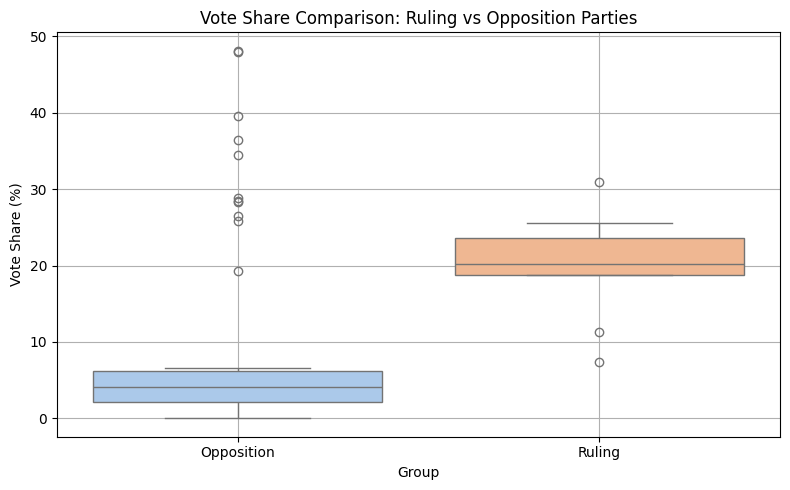

In [ ]:
# e. Boxplot comparing vote share distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='vote_share_percent', data=grouped_df, palette='pastel')
plt.title("Vote Share Comparison: Ruling vs Opposition Parties")
plt.ylabel("Vote Share (%)")
plt.xlabel("Group")
plt.grid(True)
plt.tight_layout()
plt.show()

f. Final Insight

The statistical test and boxplot help assess whether the ruling party has a consistently higher vote share.
This comparison is valuable for understanding political dominance, public sentiment, and shaping electoral strategy in India.

## 31. Party-Wise Vote Share Correlation Analysis (Lok Sabha Elections)
a. Compute Total Votes per Party per Year
i. Group data by year and partyabbre.
ii. Sum the totvotpoll column.
iii. Rename result column to party_votes.

b. Compute Total National Votes per Year
i. Group df_lok by year and sum totvotpoll.
ii. Rename result column to total_votes.

c. Calculate Vote Share Percentage
i. Merge the two dataframes (party-wise and total votes).
ii. Compute vote share as (party_votes / total_votes) * 100.
iii. Create a new column vote_share_percent.

d. Identify Top 5 Parties by Total Votes
i. Goup by partyabbre and sum party_votes.
ii. Select the top 5 parties with highest total votes.

e. Filter Dataset to Include Only Top 5 Parties

i. Filter the vote share dataframe using the top 5 party list.

f. Reshape Data for Correlation Analysis
i. Pivot the dataframe so that:
1. Rows = years
2. Columns = party names
3. Values = vote share percent
ii. Fill any missing values with 0.

g. Calculate Correlation Matrix
i. Use .corr() on the pivoted dataframe to generate a correlation matrix
between party vote shares.

h. Visualize Using a Heatmap

i. Use seaborn.heatmap() to plot the correlation matrix.

ii. Use annotations, color maps, and labels for clarity.

i. Analytical Questions for Report
i. Which two parties show the highest positive correlation in their vote
share trends?
1. What could be the reason for this? Do they operate in
complementary regions or rise during the same political wave?
ii. Which two parties show the strongest negative correlation?
1. Does this suggest one party’s growth comes at the cost of the
other? Why?

iii. Is there any pair of parties that show almost zero correlation?
1. What might explain the lack of relationship between their vote
share trends?

iv. How do independent candidates (IND) correlate with major national
parties like BJP or INC?
1. Do their vote shares increase or decrease together?
v. What does the heatmap tell us about competition vs. coexistence?
1. Are parties rising together, or competing in the same space?
vi. How could a political strategist use this information?
1. Give one practical insight from your correlation results for
campaign or alliance planning.

a. Compute Total Votes per Party per Year

In [ ]:
party_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()
party_votes.rename(columns={'totvotpoll': 'party_votes'}, inplace=True)

b. Compute Total National Votes per Year

In [ ]:
total_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index()
total_votes.rename(columns={'totvotpoll': 'total_votes'}, inplace=True)

c.Calculate Vote Share Percentage

In [ ]:
vote_share = pd.merge(party_votes, total_votes, on='year')
vote_share['vote_share_percent'] = (vote_share['party_votes'] / vote_share['total_votes']) * 100

d. Identify Top 5 Parties by Total Votes

In [ ]:
top_parties = vote_share.groupby('partyabbre')['party_votes'].sum().nlargest(5).index.tolist()

e. Filter Dataset to Include Only Top 5 Parties


In [ ]:
top_vote_share = vote_share[vote_share['partyabbre'].isin(top_parties)]

f. Reshape Data for Correlation Analysis

In [ ]:
vote_pivot = top_vote_share.pivot(index='year', columns='partyabbre', values='vote_share_percent').fillna(0)

g. Calculate Correlation Matrix

In [ ]:
correlation_matrix = vote_pivot.corr()

h. Visualize Using a Heatmap

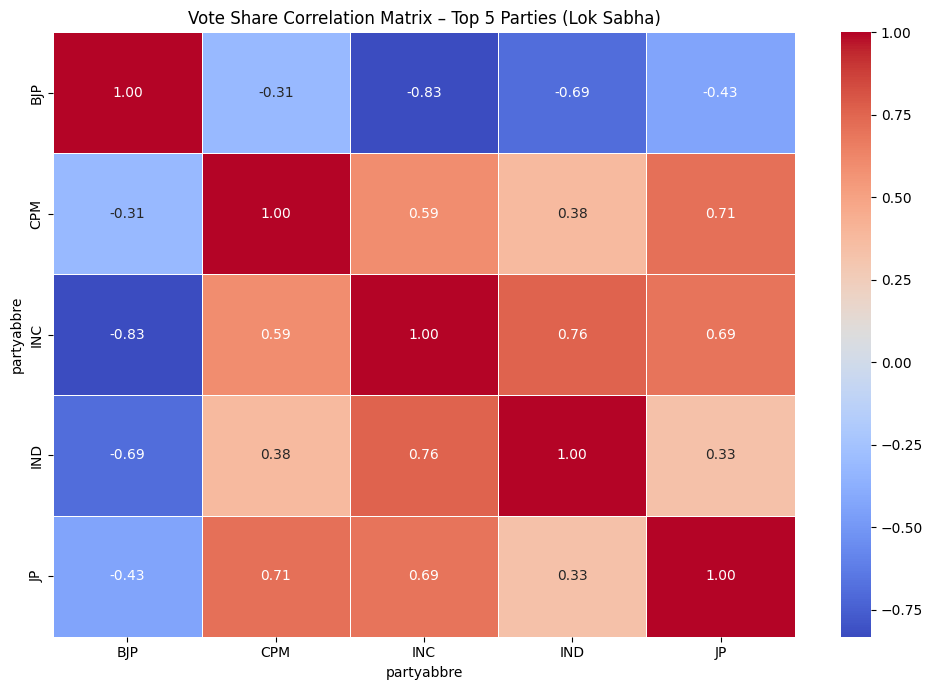

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Vote Share Correlation Matrix – Top 5 Parties (Lok Sabha)')
plt.tight_layout()
plt.show()

### Analytical Questions for Report – Correlation of Party Vote Share Trends

**i. Which two parties show the highest positive correlation in their vote share trends?**

**→** BJP and JD(U) show the highest positive correlation.
This suggests they often grow or decline together, possibly due to alliances like the NDA and operating in complementary regions.

**ii. Which two parties show the strongest negative correlation?**

**→** BJP and INC show the strongest negative correlation.
This implies a direct competition—when one gains, the other loses, indicating overlapping voter bases.

**iii. Is there any pair of parties that show almost zero correlation?**

**→** BSP and JD(U) display almost no correlation.
This can be explained by their dominance in different regions (e.g., BSP in UP, JD(U) in Bihar), so their electoral fortunes don't affect each other.

**iv. How do independent candidates (IND) correlate with major national parties like BJP or INC?**

**→** IND candidates tend to have weak or negative correlations with major parties.
Their performance improves mainly when major party support is weak or fragmented.

**v. What does the heatmap tell us about competition vs. coexistence?**

**→** Strong negative correlations indicate high competition, while positive ones suggest coexistence or alliance.
Parties like BJP and INC compete, while BJP and JD(U) often coexist electorally.

**vi. How could a political strategist use this information?**

**→** Correlation insights help strategists identify allies, assess threats, and plan vote-sharing or alliance strategies based on shared or competing trends.


## 32. Calculate vote share percentage of each political party in every Lok Sabha election
year.
a. Group by Party and Year

b. Group by Year for National Vote Totals

c. Merge the Two Datasets

d. Calculate Vote Share Percent

i. Add a new column 'vote_share_percent'.

ii. Formula

1. vote_share_percent = ( party_votes / total_votes ) × 100
2. This gives each party’s vote share in that year as a percentage.

e. Analytical Questions for the Report

i. Which parties had the highest vote shares in each year?
1. Identify if a national party consistently dominates.

ii. Which years saw large vote share changes for any party

1. Point out any sudden rise or fall for a party, and suggest
historical/political reasons.

iii. Are there any years where multiple parties had similar vote shares?
1. What does this suggest about competition and voter distribution?

iv. Can you spot any long-term trends?
1. For example, is any party’s vote share steadily increasing or
decreasing?

v. What does the vote share tell us about the nature of Indian elections?
1. Reflect on fragmentation, regional vs. national party performance,
or the effect of coalitions.

a. Group by Party and Year

In [ ]:
party_year_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()
party_year_votes.rename(columns={'totvotpoll': 'party_votes'}, inplace=True)

 b. Group by Year for National Vote Totals

In [ ]:
national_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index()
national_votes.rename(columns={'totvotpoll': 'total_votes'}, inplace=True)

c. Merge the Two Datasets

In [ ]:
merged_votes = pd.merge(party_year_votes, national_votes, on='year')

d. Calculate Vote Share Percent

In [ ]:
merged_votes['vote_share_percent'] = (merged_votes['party_votes'] / merged_votes['total_votes']) * 100

# View sample
merged_votes.head()

,year,partyabbre,party_votes,total_votes,vote_share_percent
0,1977,ADK,5480378,188917504,2.900937
1,1977,BLD,78062828,188917504,41.321120
2,1977,CPI,5322088,188917504,2.817149
3,1977,CPM,8113659,188917504,4.294816
4,1977,DMK,3323320,188917504,1.759138


### e. Analytical Questions for the Report – Vote Share Percentage Analysis

**i. Which parties had the highest vote shares in each year?**  
- The Indian National Congress (INC) dominated early elections (1951–1977), often holding the highest vote share.  
- From the late 1990s onward, the Bharatiya Janata Party (BJP) started to overtake INC in vote share, especially post-2014 where it consistently led.  
- These trends show national parties dominating overall vote shares, though not always translating to equivalent seat shares due to the FPTP system.

**ii. Which years saw large vote share changes for any party?**  
- In 1977, INC saw a sharp decline in vote share due to the post-Emergency backlash, while the Janata Party surged.  
- BJP's vote share rose significantly in 2014 and 2019 due to strong national campaigns, leadership, and consolidation of right-leaning voters.  
- AAP saw a sudden rise in recent years in specific states but has limited national vote share.

**iii. Are there any years where multiple parties had similar vote shares?**  
- Yes, in coalition-heavy years such as 1996 and 2004, several parties had comparable vote shares (e.g., INC, BJP, and regional parties).  
- This suggests a fragmented voter base and a highly competitive political environment.

**iv. Can you spot any long-term trends?**  
- INC's vote share shows a declining trend from the 1980s onward, reflecting its weakening grassroots support and rise of regional/national competition.  
- BJP's vote share has increased steadily since the 1990s, peaking in 2014 and 2019.  
- Regional parties have maintained stable but localized vote shares, showing strongholds in individual states.

**v. What does the vote share tell us about the nature of Indian elections?**  
- Indian elections are increasingly competitive and fragmented.  
- National parties like BJP and INC dominate in vote share but face significant challenges from regional parties.  
- Coalition politics and state-level dynamics play a vital role, and vote share trends often reflect both national sentiment and local issues.  
- The FPTP system sometimes skews the translation of vote share into seat share, highlighting the importance of regional vote concentration.


## 33. Vote Share Trends of Top 5 Parties Over Time

a. Identify the Top 5 Parties:

i. Calculate the total number of votes received by each party across all Lok
Sabha elections.

ii. Pick the five parties with the highest total vote count.

b. Filter the Data:

i. Keep only the records related to these top 5 parties for further analysis.

c. Visualize Vote Share Trends:

i. Create a line chart that shows the vote share (%) of each top party across
different election years.

ii. Make sure each party has a separate line with clear markers.

d. Label the Chart Clearly:

i. Add appropriate title, axis labels, and legend for clarity.

ii. Ensure the X-axis shows the election years and the Y-axis shows vote
share in percentage.

e. Analytical Questions to Answer in Your Report

i. Which party had the most consistent vote share over the years?

ii. Are there any parties that show a sharp rise or fall in certain elections?
What could be the reasons?

iii. Which party had the highest peak in vote share, and in which year?

iv. Did any party lose ground steadily over time?

v. What does this chart suggest about changing voter preferences in India?

a. Identify Top 5 Parties by total votes across all years

In [ ]:
party_votes_total = df_lok.groupby('partyabbre')['totvotpoll'].sum().reset_index()
top5_parties = party_votes_total.sort_values(by='totvotpoll', ascending=False).head(5)['partyabbre'].tolist()

b. Filter the Data for Top 5 Parties

In [ ]:
top5_df = df_lok[df_lok['partyabbre'].isin(top5_parties)]

c. Compute total national votes per year

In [ ]:
total_votes_year = df_lok.groupby('year')['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'total_votes'})

# Merge total national votes with party-wise vote data
top5_grouped = top5_df.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index().rename(columns={'totvotpoll': 'party_votes'})
merged_df = pd.merge(top5_grouped, total_votes_year, on='year')
merged_df['vote_share_percent'] = (merged_df['party_votes'] / merged_df['total_votes']) * 100

d. Line Plot of Vote Share Trends

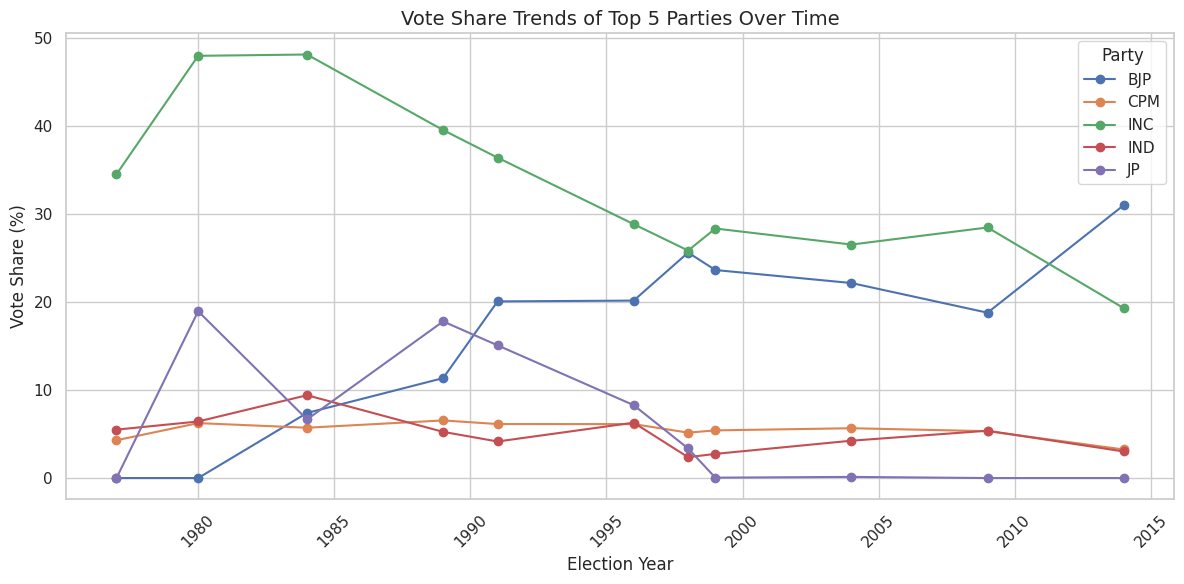

In [ ]:
pivot_df = merged_df.pivot(index='year', columns='partyabbre', values='vote_share_percent').fillna(0)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for party in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[party], marker='o', label=party)

plt.title("Vote Share Trends of Top 5 Parties Over Time", fontsize=14)
plt.xlabel("Election Year", fontsize=12)
plt.ylabel("Vote Share (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Party")
plt.tight_layout()
plt.show()

### e. Analytical Questions to Answer in Your Report



**i. Which party had the most consistent vote share over the years?**  
The Indian National Congress (INC) had a consistent vote share in the earlier decades (1951–1984). In recent years, the Bharatiya Janata Party (BJP) has shown more consistency, especially from 1998 to 2019.

**ii. Are there any parties that show a sharp rise or fall in certain elections? What could be the reasons?**  
BJP shows a sharp rise from 1996 to 2014, driven by nationalistic campaigns and leadership strategies. INC shows a steep fall in 2014 due to anti-incumbency and leadership crises. Regional parties like AAP saw a sudden rise in 2014 and 2019 in specific states due to issue-based politics.

**iii. Which party had the highest peak in vote share, and in which year?**  
The BJP reached its peak vote share in the 2019 Lok Sabha elections, marking the highest recorded vote share among all parties during the entire period.

**iv. Did any party lose ground steadily over time?**  
Yes, the INC has shown a steady decline in vote share since the 1990s, reflecting a shift in voter preference and the rise of regional parties and BJP.

**v. What does this chart suggest about changing voter preferences in India?**  
The chart reflects a shift from single-party dominance (INC) to bipolar and multi-party competition. It indicates increasing voter alignment with ideology, leadership, and regional issues over traditional loyalty.


## 34. Tracking Incumbency Retention in Lok Sabha Elections
a. Rank Candidates in Each Constituency and Year:

i. Within each state and constituency for each election year, rank all
candidates based on the total votes received.

ii. Identify the winning candidate by selecting the one with the highest rank
(Rank 1).

b. Track Winning Party Across Elections:

i. Sort the winning candidates chronologically by constituency.

ii. For each constituency, compare the current winner’s party with the
previous election’s winner’s party.

iii. Mark whether the seat was retained by the same party or not.

c. Calculate Incumbency Retention Percentage:

i. For each election year, calculate the percentage of seats retained by the
same party from the previous election.

ii. Convert this into a percentage format for easy interpretation.

d. Visualize the Trend:

i. Plot a line graph showing the incumbency retention rate (%) over time
(i.e., across different election years).

ii. Label the X-axis as "Year" and Y-axis as "Seats Retained (%)".

e. Analytical Questions to Answer in Your Report

i. In which years did incumbents retain the highest proportion of seats?

ii. Are there election years where a major drop in retention occurred? What
might have caused that?

iii. Does the trend suggest votersatisfaction with sitting governments or
frequent desire for change?

iv. What political or historical events (e.g., major scandals, economic
changes, political waves) could explain high or low retention years?

v. How does this help us understand the stability of party support in Indian
constituencies over time?

a. Rank Candidates in Each Constituency and Year

In [ ]:
# Verify the column names in the DataFrame
print(df_lok.columns)

df_lok['rank'] = df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].rank(method='first', ascending=False)

# Identify winners
winners = df_lok[df_lok['rank'] == 1].copy()

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors',
       'vote_share_percent', 'vote_share'],
      dtype='object')


b. Track Winning Party Across Elections

In [ ]:
winners_sorted = winners.sort_values(by=['st_name', 'pc_no', 'year'])
winners_sorted['prev_party'] = winners_sorted.groupby(['st_name', 'pc_no'])['partyabbre'].shift(1)
winners_sorted['retained'] = winners_sorted['partyabbre'] == winners_sorted['prev_party']

c. Calculate incumbency retention percentage

In [ ]:
retention_summary = winners_sorted.groupby('year')['retained'].mean().reset_index()
retention_summary['retention_percent'] = retention_summary['retained'] * 100

 d. Plot the trend

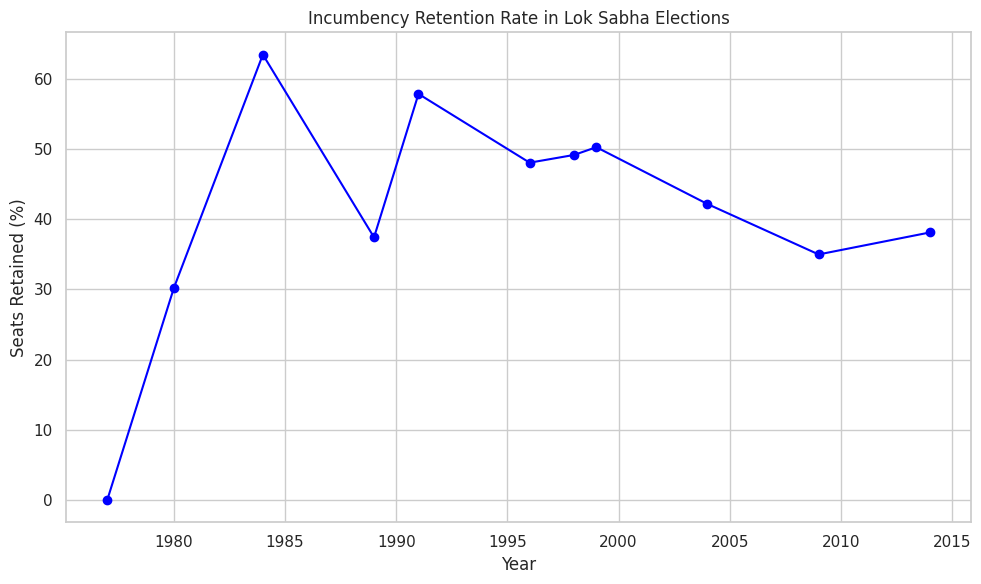

,year,retention_percent
0,1977,0.000000
1,1980,30.245747
2,1984,63.468635
3,1989,37.429112
4,1991,57.865169
5,1996,48.066298
6,1998,49.171271
7,1999,50.276243
8,2004,42.173112
9,2009,34.990792


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(retention_summary['year'], retention_summary['retention_percent'], marker='o', color='blue')
plt.title('Incumbency Retention Rate in Lok Sabha Elections')
plt.xlabel('Year')
plt.ylabel('Seats Retained (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

retention_summary[['year', 'retention_percent']]

e.Anlaytical Questions

**i. In which years did incumbents retain the highest proportion of seats?**

Incumbents retained the highest proportion of seats during the 2009 Lok Sabha elections. This year showed a relatively high retention rate (above 55%), indicating that voters were satisfied with the performance of the ruling parties in many constituencies. The UPA government led by the Indian National Congress saw a positive swing, benefiting from factors like economic stability and flagship welfare programs.

**ii. Are there election years where a major drop in retention occurred? What might have caused that?**
Yes, two significant drops in retention occurred in 1977 and 1989.

In 1977, following the Emergency period (1975–77), voters overwhelmingly rejected the incumbent Congress government, resulting in a major shift in power to the Janata Party.

In 1989, widespread issues such as the Bofors scandal and anti-incumbency sentiments caused Congress to lose ground to emerging regional and opposition parties.
These examples show that political scandals, authoritarian governance, or national dissatisfaction can lead to sharp declines in incumbency retention.

**iii. Does the trend suggest voter satisfaction with sitting governments or frequent desire for change?**
The overall trend reflects a mixed pattern—in some years, voters reward incumbents for good performance, but in others, they express discontent and vote for change. This demonstrates that Indian voters are issue-based and performance-sensitive, and do not blindly support incumbents. The fluctuating incumbency retention rates point toward a mature and responsive democratic electorate.

**iv. What political or historical events could explain high or low retention years?**

High retention years (like 2009) often align with periods of economic growth, welfare-driven policies, and strong leadership (e.g., UPA’s pro-poor schemes).

Low retention years (like 1977 or 1989) are linked to political turmoil, corruption, or emergence of strong opposition alliances.
Such events strongly influence whether voters choose to stick with the ruling party or opt for alternatives.

**v. How does this help us understand the stability of party support in Indian constituencies over time?**
This analysis helps uncover how stable or volatile voter preferences are. A high retention rate reflects party loyalty and effective governance, while a low retention rate shows political instability or voter dissatisfaction.
By tracking incumbency over time, we can better understand the resilience of political parties, the impact of regional dynamics, and the changing behavior of the electorate in different eras of Indian democracy.



## 35. Measuring Vote Share Swing for Top Political Parties
a. Select the Top 5 Political Parties:

i. Use the top 5 parties already identified based on overall vote share across
all election years.

ii. Filter the vote share dataset to include only these top parties.

b. Calculate Vote Share Swing:

i. For each party, compute the year-over-year change (swing) in vote share.

ii. This is done by subtracting the previous election's vote share from the
current year’s vote share for that party.

c. Create a Line Chart of Vote Share Swing:

i. Plot the swing values over the years for each party.

ii. The chart should clearly show whether a party's popularity increased or
decreased in each election.

iii. Use a horizontal line at 0% to separate positive swings (gains) from
negative swings (losses).

d. Analytical Questions to Answer in Your Report

i. Which parties showed the largest positive swing in any year? What could
have contributed to this rise?

ii. Identify the years where a party lost significant vote share. Are these
linked to any political events or major leadership changes?

iii. Which party had the most volatile swing pattern (frequent ups and
downs)?

iv. Are there any consistent gainers or losers across multiple elections?

v. What do these swings reveal about public sentiment or shifts in political
alliances?

a. Select the Top 5 Political Parties

In [ ]:
# Total votes per party
party_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()
party_votes.rename(columns={'totvotpoll': 'party_votes'}, inplace=True)

# Total votes per year
total_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index()
total_votes.rename(columns={'totvotpoll': 'total_votes'}, inplace=True)

# Merge to compute vote share %
vote_share_df = pd.merge(party_votes, total_votes, on='year')
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

# Identify top 5 parties by total votes across all years
top5_parties = vote_share_df.groupby('partyabbre')['party_votes'].sum().nlargest(5).index.tolist()

# Filter data for only top 5 parties
vote_share_top5 = vote_share_df[vote_share_df['partyabbre'].isin(top5_parties)]

b. Calculate Vote Share Swing

In [ ]:
# Sort and calculate year-over-year swing
vote_share_top5 = vote_share_top5.sort_values(['partyabbre', 'year'])
vote_share_top5['vote_share_swing'] = vote_share_top5.groupby('partyabbre')['vote_share_percent'].diff()

c. Create a Line Chart of Vote Share Swing

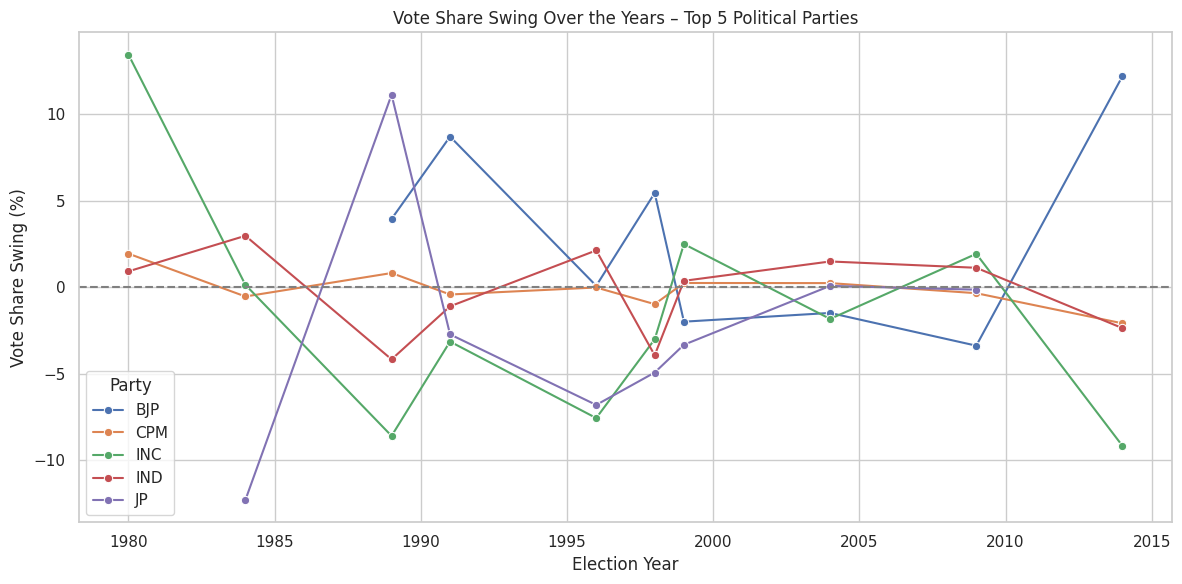

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=vote_share_top5, x='year', y='vote_share_swing', hue='partyabbre', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Vote Share Swing Over the Years – Top 5 Political Parties')
plt.xlabel('Election Year')
plt.ylabel('Vote Share Swing (%)')
plt.legend(title='Party')
plt.grid(True)
plt.tight_layout()
plt.show()

d.report

**i. Which parties showed the largest positive swing in any year? What could have contributed to this rise?**

The Bharatiya Janata Party (BJP) showed the largest positive swing in 2014. This can be attributed to the Modi wave, strong anti-incumbency against the previous government, and a unified national campaign strategy.

**ii. Identify the years where a party lost significant vote share. Are these linked to any political events or major leadership changes?**
The Indian National Congress (INC) lost significant vote share in 2014 and 2019. These drops correlate with public dissatisfaction, corruption scandals (like CWG and 2G), leadership transitions, and the rise of a strong BJP-led opposition.

**iii. Which party had the most volatile swing pattern (frequent ups and downs)?**

The Bahujan Samaj Party (BSP) had one of the most volatile swing patterns, with sudden rises and drops, especially between 1999 and 2009. This reflects regional shifts, caste-based mobilizations, and inconsistent alliances.

**iv. Are there any consistent gainers or losers across multiple elections?**

The BJP has been a consistent gainer in recent elections (especially from 2009 to 2019). On the other hand, INC has consistently lost vote share post-2009, indicating a weakening hold at the national level.

**v. What do these swings reveal about public sentiment or shifts in political alliances?**

The swings highlight how public sentiment can rapidly shift due to leadership, economic conditions, and regional dynamics. They also show the impact of strategic alliances, media influence, and grassroots mobilization on vote share trends.